## Import packages

In [41]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import os


## Data Collection

In [42]:
def scrape_monthly_data(ticker):
    print(f"Scraping monthly data for ticker: {ticker}")
    folder_path = '../data/raw'
    try:
        start_date = int(datetime(2019, 1, 1).timestamp())
        end_date = int(datetime(2024, 4, 1).timestamp())
        url = f'https://finance.yahoo.com/quote/{ticker}/history?period1={start_date}&period2={end_date}&interval=1mo&filter=history&frequency=1mo'
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            table = soup.find('table')
            if table:
                headers = ['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
                rows = []
                for row in table.find_all('tr'):
                    cols = row.find_all('td')
                    if len(cols) > 0:
                        rows.append([cell.text.strip() for cell in cols])

                df = pd.DataFrame(rows, columns=headers)
                return df
            else:
                raise ValueError("Table not found on Yahoo Finance page")
        else:
            response.raise_for_status()
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [43]:
def fetch_financial_statements(ticker_symbol):
    # Create a Ticker object
    ticker = yf.Ticker(ticker_symbol)

    # Fetch financial statements
    financial_statements = {
        'annual_income_statement': ticker.financials.T,
        #'quarterly_income_statement': ticker.quarterly_financials.T,
        'annual_balance_sheet': ticker.balance_sheet.T,
        #'quarterly_balance_sheet': ticker.quarterly_balance_sheet.T,
        'annual_cash_flow': ticker.cashflow.T,
        #'quarterly_cash_flow': ticker.quarterly_cashflow.T
    }

    return financial_statements

In [44]:
# Scrape every data
company_tickers = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']
company_data = {}
company_names = {
    'META': 'META (Meta Platforms, Inc.)',
    'AMZN': 'AMZN (Amazon.com, Inc.)',
    'AAPL': 'AAPL (Apple Inc.)',
    'NFLX': 'NFLX (Netflix, Inc.)',
    'GOOGL': 'GOOGL (Alphabet Inc.)'
}
for ticker in company_tickers:
  company_data[ticker] = scrape_monthly_data(ticker)
  display(Markdown(f'### {company_names[ticker]}'))
  display(company_data[ticker])

# We should make a title for each tickers
#Like display(Markdown("## Goldman Sachs"))

Scraping monthly data for ticker: META


### META (Meta Platforms, Inc.)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 1, 2024",487.20,531.49,414.50,443.29,443.29,"396,434,200"
1,"Mar 1, 2024",492.11,523.57,476.00,485.58,485.58,"279,558,900"
2,"Feb 21, 2024",0.50 Dividend,None,None,None,None,None
3,"Feb 1, 2024",393.94,494.36,393.05,490.13,489.61,"466,151,400"
4,"Jan 1, 2024",351.32,406.36,340.01,390.14,389.73,"347,020,200"
5,"Dec 1, 2023",325.48,361.90,313.66,353.96,353.58,"332,813,800"
6,"Nov 1, 2023",301.85,342.92,301.85,327.15,326.80,"329,270,500"
7,"Oct 1, 2023",302.74,330.54,279.40,301.27,300.95,"511,307,900"
8,"Sep 1, 2023",299.37,312.87,286.79,300.21,299.89,"406,686,600"
9,"Aug 1, 2023",317.54,324.14,274.38,295.89,295.58,"423,147,800"


Scraping monthly data for ticker: AMZN


### AMZN (Amazon.com, Inc.)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 1, 2024",180.79,189.77,166.32,179.62,179.62,"766,430,600"
1,"Mar 1, 2024",176.75,181.70,171.47,180.38,180.38,"701,928,900"
2,"Feb 1, 2024",155.87,177.22,155.62,176.76,176.76,"1,045,061,200"
3,"Jan 1, 2024",151.54,161.73,144.05,155.20,155.20,"953,344,900"
4,"Dec 1, 2023",146.00,155.63,142.81,151.94,151.94,"931,128,600"
5,"Nov 1, 2023",133.96,149.26,133.71,146.09,146.09,"1,025,986,900"
6,"Oct 1, 2023",127.28,134.48,118.35,133.09,133.09,"1,224,564,700"
7,"Sep 1, 2023",139.46,145.86,123.04,127.12,127.12,"1,120,271,900"
8,"Aug 1, 2023",133.55,143.63,126.41,138.01,138.01,"1,210,426,200"
9,"Jul 1, 2023",130.82,136.65,125.92,133.68,133.68,"1,058,754,800"


Scraping monthly data for ticker: AAPL


### AAPL (Apple Inc.)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 1, 2024",171.19,178.36,164.08,169.30,169.30,"1,111,299,500"
1,"Mar 1, 2024",179.55,180.53,168.49,171.48,171.48,"1,432,782,800"
2,"Feb 9, 2024",0.24 Dividend,None,None,None,None,None
3,"Feb 1, 2024",183.99,191.05,179.25,180.75,180.52,"1,161,627,000"
4,"Jan 1, 2024",187.15,196.38,180.17,184.40,184.16,"1,187,219,300"
5,"Dec 1, 2023",190.33,199.62,187.45,192.53,192.28,"1,062,774,800"
6,"Nov 10, 2023",0.24 Dividend,None,None,None,None,None
7,"Nov 1, 2023",171.00,192.93,170.12,189.95,189.46,"1,099,586,100"
8,"Oct 1, 2023",171.22,182.34,165.67,170.77,170.33,"1,172,719,600"
9,"Sep 1, 2023",189.49,189.98,167.62,171.21,170.77,"1,337,586,600"


Scraping monthly data for ticker: NFLX


### NFLX (Netflix, Inc.)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 1, 2024",608.00,639.00,542.01,561.23,561.23,"88,081,300"
1,"Mar 1, 2024",599.81,634.39,592.00,607.33,607.33,"60,140,100"
2,"Feb 1, 2024",567.02,605.36,549.00,602.92,602.92,"71,652,900"
3,"Jan 1, 2024",483.19,579.64,461.86,564.11,564.11,"145,889,000"
4,"Dec 1, 2023",473.17,500.89,445.73,486.88,486.88,"80,411,900"
5,"Nov 1, 2023",414.77,482.70,414.18,473.97,473.97,"71,741,400"
6,"Oct 1, 2023",377.48,418.84,344.73,411.69,411.69,"164,021,900"
7,"Sep 1, 2023",437.73,453.45,371.10,377.60,377.60,"100,278,600"
8,"Aug 1, 2023",437.37,445.25,398.15,433.68,433.68,"107,298,900"
9,"Jul 1, 2023",439.76,485.00,411.88,438.97,438.97,"168,720,200"


Scraping monthly data for ticker: GOOGL


### GOOGL (Alphabet Inc.)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 1, 2024",150.69,174.71,149.60,171.95,171.95,"579,979,000"
1,"Mar 1, 2024",138.43,152.26,130.67,150.93,150.93,"672,605,900"
2,"Feb 1, 2024",142.12,149.44,135.41,138.46,138.46,"647,669,400"
3,"Jan 1, 2024",138.55,153.78,135.15,140.10,140.10,"580,875,000"
4,"Dec 1, 2023",131.86,142.68,127.90,139.69,139.69,"619,903,000"
5,"Nov 1, 2023",124.07,139.42,123.72,132.53,132.53,"535,220,300"
6,"Oct 1, 2023",131.21,141.22,120.21,124.08,124.08,"680,712,800"
7,"Sep 1, 2023",137.46,139.16,127.22,130.86,130.86,"477,542,100"
8,"Aug 1, 2023",130.78,138.00,126.38,136.17,136.17,"593,289,000"
9,"Jul 1, 2023",119.24,133.74,115.35,132.72,132.72,"708,341,500"


In [45]:
# Financial data
company_financial_data = {}
pd.set_option('display.max_rows', None)
for ticker in company_tickers:
    company_financial_data[ticker] = fetch_financial_statements(ticker)
    display(Markdown(f'### {ticker}'))
    for key in company_financial_data[ticker].keys():
      display(Markdown(f'#### {key}'))
      display(company_financial_data[ticker][key])


### META

#### annual_income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,-64416000.0,0.176,59418000000.0,-366000000.0,-366000000.0,39098000000.0,11178000000.0,25959000000.0,59052000000.0,47874000000.0,...,62192000000.0,38483000000.0,23709000000.0,12301000000.0,11408000000.0,11408000000.0,108943000000.0,25959000000.0,134902000000.0,133844000000.0
2022-12-31,-15795000.0,0.195,37771000000.0,-81000000.0,-81000000.0,23200000000.0,8686000000.0,25249000000.0,37690000000.0,29004000000.0,...,62416000000.0,35338000000.0,27078000000.0,15262000000.0,11816000000.0,11816000000.0,91360000000.0,25249000000.0,116609000000.0,115801000000.0
2021-12-31,-23380000.0,0.167,55414000000.0,-140000000.0,-140000000.0,39370000000.0,7967000000.0,22649000000.0,55274000000.0,47307000000.0,...,48527000000.0,24655000000.0,23872000000.0,14043000000.0,9829000000.0,9829000000.0,95280000000.0,22649000000.0,117929000000.0,117208000000.0
2020-12-31,-15738000.0,0.122,39662000000.0,-129000000.0,-129000000.0,29146000000.0,6862000000.0,16692000000.0,39533000000.0,32671000000.0,...,36602000000.0,18447000000.0,18155000000.0,11591000000.0,6564000000.0,6564000000.0,69273000000.0,16692000000.0,85965000000.0,85308000000.0


#### annual_balance_sheet

,Treasury Shares Number,Ordinary Shares Number,Share Issued,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,...,Prepaid Assets,Receivables,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2023-12-31,0.0,2561000000.0,2561000000.0,37234000000.0,131726000000.0,171553000000.0,53405000000.0,131726000000.0,18849000000.0,153168000000.0,...,NaN,16169000000.0,16169000000.0,NaN,NaN,65403000000.0,23541000000.0,41862000000.0,35597000000.0,6265000000.0
2022-12-31,NaN,2614000000.0,2614000000.0,26591000000.0,104510000000.0,135636000000.0,32523000000.0,104510000000.0,16668000000.0,125713000000.0,...,NaN,13466000000.0,13466000000.0,NaN,NaN,40738000000.0,26057000000.0,14681000000.0,8505000000.0,6176000000.0
2021-12-31,NaN,2741000000.0,2741000000.0,13873000000.0,105048000000.0,124879000000.0,45531000000.0,105048000000.0,13873000000.0,124879000000.0,...,4629000000.0,14039000000.0,14039000000.0,NaN,NaN,47998000000.0,31397000000.0,16601000000.0,9293000000.0,7308000000.0
2020-12-31,NaN,2849000000.0,2849000000.0,10654000000.0,108617000000.0,128290000000.0,60689000000.0,108617000000.0,10654000000.0,128290000000.0,...,2381000000.0,11335000000.0,11335000000.0,-114000000.0,11449000000.0,61954000000.0,44378000000.0,17576000000.0,11088000000.0,6488000000.0


#### annual_cash_flow

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,...,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Unrealized Gain Loss On Investment Securities,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2023-12-31,43847000000.0,-19774000000.0,-1058000000.0,8455000000.0,-27266000000.0,448000000.0,6607000000.0,42827000000.0,15596000000.0,113000000.0,...,-2399000000.0,411000000.0,14027000000.0,NaN,2432000000.0,131000000.0,131000000.0,11178000000.0,11178000000.0,39098000000.0
2022-12-31,19044000000.0,-27956000000.0,-850000000.0,9921000000.0,-31431000000.0,0.0,6407000000.0,15596000000.0,16865000000.0,-638000000.0,...,231000000.0,1982000000.0,11992000000.0,463000000.0,2218000000.0,-3286000000.0,-3286000000.0,8686000000.0,8686000000.0,23200000000.0
2021-12-31,38993000000.0,-44537000000.0,-677000000.0,0.0,-18690000000.0,0.0,8525000000.0,16865000000.0,17954000000.0,-474000000.0,...,-3110000000.0,-127000000.0,9164000000.0,-232000000.0,0.0,609000000.0,609000000.0,7967000000.0,7967000000.0,39370000000.0
2020-12-31,23584000000.0,-6272000000.0,-604000000.0,0.0,-15163000000.0,NaN,4229000000.0,17954000000.0,19279000000.0,279000000.0,...,-1512000000.0,85000000.0,6536000000.0,33000000.0,0.0,-1192000000.0,-1192000000.0,6862000000.0,6862000000.0,29146000000.0


### AMZN

#### annual_income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Other Operating Expenses,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,211380035.679101,0.189579,88287000000.0,1115000000.0,1115000000.0,30425000000.0,48663000000.0,480980000000.0,89402000000.0,40739000000.0,...,767000000.0,NaN,56186000000.0,44370000000.0,11816000000.0,11816000000.0,93805000000.0,480980000000.0,574785000000.0,574785000000.0
2022-12-31,-3415860000.0,0.21,54618000000.0,-16266000000.0,-16266000000.0,-2722000000.0,41921000000.0,446343000000.0,38352000000.0,-3569000000.0,...,1263000000.0,NaN,54129000000.0,42238000000.0,11891000000.0,11891000000.0,67640000000.0,446343000000.0,513983000000.0,513983000000.0
2021-12-31,1839997169.143666,0.12558,59741000000.0,14652000000.0,14652000000.0,33364000000.0,34433000000.0,403507000000.0,74393000000.0,39960000000.0,...,62000000.0,NaN,41374000000.0,32551000000.0,8823000000.0,8823000000.0,66315000000.0,403507000000.0,469822000000.0,469822000000.0
2020-12-31,287626230.457441,0.118413,48647000000.0,2429000000.0,2429000000.0,21331000000.0,25251000000.0,334564000000.0,51076000000.0,25825000000.0,...,-75000000.0,42740000000.0,28676000000.0,22008000000.0,6668000000.0,6668000000.0,51500000000.0,334564000000.0,386064000000.0,386064000000.0


#### annual_balance_sheet

,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,...,Current Assets,Inventory,Finished Goods,Receivables,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents
2023-12-31,515000000.0,10383000000.0,10898000000.0,NaN,135611000000.0,171399000000.0,260189000000.0,7434000000.0,171399000000.0,77297000000.0,...,172351000000.0,33318000000.0,NaN,52253000000.0,52253000000.0,-1700000000.0,53953000000.0,86780000000.0,13393000000.0,73387000000.0
2022-12-31,515000000.0,10242000000.0,10757000000.0,13262000000.0,140118000000.0,119658000000.0,213193000000.0,-8602000000.0,119658000000.0,72968000000.0,...,146791000000.0,34405000000.0,NaN,42360000000.0,42360000000.0,-1400000000.0,43760000000.0,70026000000.0,16138000000.0,53888000000.0
2021-12-31,460000000.0,10180000000.0,10640000000.0,12524000000.0,116395000000.0,117767000000.0,186989000000.0,19314000000.0,117767000000.0,67651000000.0,...,161580000000.0,32640000000.0,32640000000.0,32891000000.0,32891000000.0,-1100000000.0,33991000000.0,96049000000.0,59829000000.0,36220000000.0
2020-12-31,480000000.0,10060000000.0,10540000000.0,NaN,84389000000.0,73406000000.0,125220000000.0,6348000000.0,73406000000.0,52573000000.0,...,132733000000.0,23795000000.0,23795000000.0,24542000000.0,24542000000.0,-1100000000.0,25642000000.0,84396000000.0,42274000000.0,42122000000.0


#### annual_cash_flow

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2023-12-31,32217000000.0,0.0,-33737000000.0,18129000000.0,-52729000000.0,3112000000.0,11179000000.0,73890000000.0,54253000000.0,403000000.0,...,1449000000.0,-8348000000.0,-8348000000.0,-748000000.0,24023000000.0,-5876000000.0,-5876000000.0,48663000000.0,48663000000.0,30425000000.0
2022-12-31,-16893000000.0,-6000000000.0,-46753000000.0,62719000000.0,-63645000000.0,2142000000.0,6035000000.0,54253000000.0,36477000000.0,-1093000000.0,...,-2592000000.0,-8622000000.0,-8622000000.0,16966000000.0,19621000000.0,-8148000000.0,-8148000000.0,41921000000.0,41921000000.0,-2722000000.0
2021-12-31,-14726000000.0,0.0,-20506000000.0,26959000000.0,-61053000000.0,1772000000.0,3688000000.0,36477000000.0,42377000000.0,-364000000.0,...,-9487000000.0,-9145000000.0,-9145000000.0,-14306000000.0,12757000000.0,-310000000.0,-310000000.0,34433000000.0,34433000000.0,33364000000.0
2020-12-31,25924000000.0,0.0,-18425000000.0,17321000000.0,-40140000000.0,1630000000.0,1713000000.0,42377000000.0,36410000000.0,618000000.0,...,-2849000000.0,-8169000000.0,-8169000000.0,-2653000000.0,9208000000.0,-554000000.0,-554000000.0,25251000000.0,25251000000.0,21331000000.0


### AAPL

#### annual_income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-09-30,0.0,0.147,129188000000.0,96995000000.0,11519000000.0,214137000000.0,129188000000.0,117669000000.0,-183000000.0,3933000000.0,...,3933000000.0,3750000000.0,114301000000.0,54847000000.0,29915000000.0,24932000000.0,169148000000.0,214137000000.0,383285000000.0,383285000000.0
2022-09-30,0.0,0.162,133138000000.0,99803000000.0,11104000000.0,223546000000.0,133138000000.0,122034000000.0,-106000000.0,2931000000.0,...,2931000000.0,2825000000.0,119437000000.0,51345000000.0,26251000000.0,25094000000.0,170782000000.0,223546000000.0,394328000000.0,394328000000.0
2021-09-30,0.0,0.133,123136000000.0,94680000000.0,11284000000.0,212981000000.0,123136000000.0,111852000000.0,198000000.0,2645000000.0,...,2645000000.0,2843000000.0,108949000000.0,43887000000.0,21914000000.0,21973000000.0,152836000000.0,212981000000.0,365817000000.0,365817000000.0
2020-09-30,0.0,0.144,81020000000.0,57411000000.0,11056000000.0,169559000000.0,81020000000.0,69964000000.0,890000000.0,2873000000.0,...,2873000000.0,3763000000.0,66288000000.0,38668000000.0,18752000000.0,19916000000.0,104956000000.0,169559000000.0,274515000000.0,274515000000.0


#### annual_balance_sheet

,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Common Stock Equity,...,Other Current Assets,Inventory,Receivables,Other Receivables,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2023-09-30,0.0,15550061000.0,15550061000.0,81123000000.0,111088000000.0,62146000000.0,173234000000.0,-1742000000.0,62146000000.0,62146000000.0,...,14695000000.0,6331000000.0,60985000000.0,31477000000.0,29508000000.0,61555000000.0,31590000000.0,29965000000.0,1606000000.0,28359000000.0
2022-09-30,NaN,15943425000.0,15943425000.0,96423000000.0,120069000000.0,50672000000.0,170741000000.0,-18577000000.0,50672000000.0,50672000000.0,...,21223000000.0,4946000000.0,60932000000.0,32748000000.0,28184000000.0,48304000000.0,24658000000.0,23646000000.0,5100000000.0,18546000000.0
2021-09-30,NaN,16426786000.0,16426786000.0,89779000000.0,124719000000.0,63090000000.0,187809000000.0,9355000000.0,63090000000.0,63090000000.0,...,14111000000.0,6580000000.0,51506000000.0,25228000000.0,26278000000.0,62639000000.0,27699000000.0,34940000000.0,17635000000.0,17305000000.0
2020-09-30,NaN,16976763000.0,16976763000.0,74420000000.0,112436000000.0,65339000000.0,177775000000.0,38321000000.0,65339000000.0,65339000000.0,...,11264000000.0,4061000000.0,37445000000.0,21325000000.0,16120000000.0,90943000000.0,52927000000.0,38016000000.0,20243000000.0,17773000000.0


#### annual_cash_flow

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2023-09-30,99584000000.0,-77550000000.0,-11151000000.0,5228000000.0,NaN,-10959000000.0,3803000000.0,18679000000.0,30737000000.0,24977000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
2022-09-30,111443000000.0,-89402000000.0,-9543000000.0,5465000000.0,NaN,-10708000000.0,2865000000.0,19573000000.0,24977000000.0,35929000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2021-09-30,92953000000.0,-85971000000.0,-8750000000.0,20393000000.0,1105000000.0,-11085000000.0,2687000000.0,25385000000.0,35929000000.0,39789000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
2020-09-30,73365000000.0,-72358000000.0,-12629000000.0,16091000000.0,880000000.0,-7309000000.0,3002000000.0,9501000000.0,39789000000.0,50224000000.0,...,-127000000.0,8470000000.0,6917000000.0,-97000000.0,6829000000.0,-215000000.0,-215000000.0,11056000000.0,11056000000.0,57411000000.0


### NFLX

#### annual_income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,0.0,0.13,21508387000.0,5407990000.0,14554384000.0,19715368000.0,21508387000.0,6954003000.0,-748598000.0,748598000.0,...,7053926000.0,2675758000.0,4378168000.0,2657883000.0,1720285000.0,1720285000.0,14007929000.0,19715368000.0,33723297000.0,33723297000.0
2022-12-31,0.0,0.15,20332955000.0,4491924000.0,14362814000.0,19168285000.0,20332955000.0,5970141000.0,-368902000.0,706212000.0,...,6814434000.0,2711041000.0,4103393000.0,2530502000.0,1572891000.0,1572891000.0,12447265000.0,19168285000.0,31615550000.0,31615550000.0
2021-12-31,0.0,0.12,19044502000.0,5116228000.0,12438779000.0,17332683000.0,19044502000.0,6605723000.0,-354406000.0,765620000.0,...,6170652000.0,2273885000.0,3896767000.0,2545146000.0,1351621000.0,1351621000.0,12365161000.0,17332683000.0,29697844000.0,29697844000.0
2020-12-31,0.0,0.14,15507911000.0,2761395000.0,10922622000.0,15276319000.0,15507911000.0,4585289000.0,-1385940000.0,1385940000.0,...,5134448000.0,1829600000.0,3304848000.0,2228362000.0,1076486000.0,1076486000.0,9719737000.0,15276319000.0,24996056000.0,24996056000.0


#### annual_balance_sheet

,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Common Stock Equity,...,Other Current Assets,Prepaid Assets,Receivables,Taxes Receivable,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2023-12-31,16078268.0,432759584.0,448837852.0,7426348000.0,14543261000.0,-11069743000.0,35131574000.0,1057478000.0,-11069743000.0,20588313000.0,...,529257000.0,408936000.0,1842054000.0,555000000.0,1287054000.0,7137886000.0,20973000.0,7116913000.0,1130284000.0,5986629000.0
2022-12-31,1564478.0,445346776.0,446911254.0,9205900000.0,14353076000.0,-11959312000.0,35130477000.0,1335499000.0,-11959312000.0,20777401000.0,...,1228388000.0,392735000.0,1586898000.0,598000000.0,988898000.0,6058452000.0,911276000.0,5147176000.0,1075592000.0,4071584000.0
2021-12-31,1564478.0,443963107.0,445527585.0,9365091000.0,15392895000.0,-15070291000.0,31242143000.0,-419141000.0,-15070291000.0,15849248000.0,...,913883000.0,323818000.0,804320000.0,NaN,804320000.0,6027804000.0,0.0,6027804000.0,1924191000.0,4103613000.0
2020-12-31,NaN,442895261.0,442895261.0,8103423000.0,16308973000.0,-14318710000.0,27374213000.0,1955795000.0,-14318710000.0,11065240000.0,...,742169000.0,203042000.0,610819000.0,NaN,610819000.0,8205550000.0,NaN,8205550000.0,4873690000.0,3331860000.0


#### annual_cash_flow

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Net Foreign Currency Exchange Gain Loss,Net Income From Continuing Operations
2023-12-31,6925749000.0,-6045347000.0,0.0,NaN,169990000.0,-348552000.0,684504000.0,1154973000.0,7118515000.0,5170582000.0,...,-459359000.0,-459359000.0,14554384000.0,14554384000.0,14197437000.0,14197437000.0,356947000.0,176296000.0,176296000.0,5407990000.0
2022-12-31,1618528000.0,0.0,-700000000.0,0.0,35746000.0,-407729000.0,701693000.0,811720000.0,5170582000.0,6055111000.0,...,-166550000.0,-166550000.0,14362814000.0,14362814000.0,14026132000.0,14026132000.0,336682000.0,-353111000.0,-353111000.0,4491924000.0
2021-12-31,-131975000.0,-600022000.0,-500000000.0,0.0,174414000.0,-524585000.0,763432000.0,509265000.0,6055111000.0,8238870000.0,...,199548000.0,199548000.0,12438779000.0,12438779000.0,12230367000.0,12230367000.0,208412000.0,-430661000.0,-430661000.0,5116228000.0
2020-12-31,1929154000.0,0.0,0.0,1009464000.0,235406000.0,-497923000.0,762904000.0,291582000.0,8238870000.0,5043786000.0,...,70066000.0,70066000.0,10922622000.0,10922622000.0,10806912000.0,10806912000.0,115710000.0,533278000.0,533278000.0,2761395000.0


### GOOGL

#### annual_income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,-286479000.0,0.139,100032000000.0,-2061000000.0,-2061000000.0,73795000000.0,11946000000.0,133332000000.0,97971000000.0,86025000000.0,...,89769000000.0,45427000000.0,44342000000.0,27917000000.0,16425000000.0,16425000000.0,174062000000.0,133332000000.0,307394000000.0,307394000000.0
2022-12-31,-981507000.0,0.159,91333000000.0,-6173000000.0,-6173000000.0,59972000000.0,13475000000.0,126203000000.0,85160000000.0,71685000000.0,...,81791000000.0,39500000000.0,42291000000.0,26567000000.0,15724000000.0,15724000000.0,156633000000.0,126203000000.0,282836000000.0,282836000000.0
2021-12-31,1948860000.0,0.162,91491000000.0,12030000000.0,12030000000.0,76033000000.0,12441000000.0,110939000000.0,103521000000.0,91080000000.0,...,67984000000.0,31562000000.0,36422000000.0,22912000000.0,13510000000.0,13510000000.0,146698000000.0,110939000000.0,257637000000.0,257637000000.0
2020-12-31,970572126.783412,0.162493,55941000000.0,5973000000.0,5973000000.0,40269000000.0,13697000000.0,84732000000.0,61914000000.0,48217000000.0,...,56571000000.0,27573000000.0,28998000000.0,17946000000.0,11052000000.0,11052000000.0,97795000000.0,84732000000.0,182527000000.0,182527000000.0


#### annual_balance_sheet

,Treasury Shares Number,Ordinary Shares Number,Share Issued,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,...,Other Current Assets,Inventory,Receivables,Taxes Receivable,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents
2023-12-31,0.0,12460000000.0,12460000000.0,28504000000.0,254181000000.0,295249000000.0,89716000000.0,254181000000.0,16634000000.0,283379000000.0,...,12650000000.0,NaN,47964000000.0,NaN,47964000000.0,-771000000.0,48735000000.0,110916000000.0,86868000000.0,24048000000.0
2022-12-31,NaN,12849000000.0,12849000000.0,29679000000.0,227184000000.0,269001000000.0,95495000000.0,227184000000.0,16822000000.0,256144000000.0,...,10775000000.0,2670000000.0,40258000000.0,NaN,40258000000.0,-754000000.0,41012000000.0,113762000000.0,91883000000.0,21879000000.0
2021-12-31,NaN,13242420000.0,13242420000.0,28395000000.0,227262000000.0,264479000000.0,123889000000.0,227262000000.0,15551000000.0,251635000000.0,...,8020000000.0,1170000000.0,39304000000.0,966000000.0,39304000000.0,-550000000.0,39854000000.0,139649000000.0,118704000000.0,20945000000.0
2020-12-31,NaN,13504440000.0,13504440000.0,26772000000.0,199924000000.0,235376000000.0,117462000000.0,199924000000.0,13940000000.0,222544000000.0,...,5490000000.0,728000000.0,31384000000.0,454000000.0,30930000000.0,-789000000.0,31719000000.0,136694000000.0,110229000000.0,26465000000.0


#### annual_cash_flow

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2023-12-31,69495000000.0,-61504000000.0,-11550000000.0,10790000000.0,-32251000000.0,19164000000.0,24048000000.0,21879000000.0,-421000000.0,2590000000.0,...,-7763000000.0,-7763000000.0,11946000000.0,11946000000.0,NaN,NaN,11946000000.0,823000000.0,823000000.0,73795000000.0
2022-12-31,60010000000.0,-59296000000.0,-54068000000.0,52872000000.0,-31485000000.0,18892000000.0,21879000000.0,20945000000.0,-506000000.0,1440000000.0,...,-8081000000.0,-8081000000.0,13475000000.0,13475000000.0,641000000.0,641000000.0,13475000000.0,5519000000.0,5519000000.0,59972000000.0
2021-12-31,67012000000.0,-50274000000.0,-21435000000.0,20199000000.0,-24640000000.0,13412000000.0,20945000000.0,26465000000.0,-287000000.0,-5233000000.0,...,1808000000.0,1808000000.0,12441000000.0,12441000000.0,886000000.0,886000000.0,11555000000.0,-12270000000.0,-12270000000.0,76033000000.0
2020-12-31,42843000000.0,-31149000000.0,-2100000000.0,11761000000.0,-22281000000.0,4990000000.0,26465000000.0,18498000000.0,24000000.0,7943000000.0,...,1390000000.0,1390000000.0,13697000000.0,13697000000.0,792000000.0,792000000.0,12905000000.0,-6317000000.0,-6317000000.0,40269000000.0


## Data Cleaning

In [46]:
def clean_stock_data(df):
    # Convert the date column to datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Remove any rows where the market was not open
    df = df[df['Volume'] != 0]

    # Convert price columns to numeric, coerce errors to NaN so they can be handled later
    price_columns = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
    for col in price_columns:
        # Ensure the column is in string format for replacement
        df[col] = df[col].astype(str)
        # Remove any commas which can interfere with conversion to numeric type
        df[col] = df[col].str.replace(',', '')
        # Convert to numeric, setting errors='coerce' will turn unconvertible data into NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove any rows that have NaN values after this conversion
    df.dropna(inplace=True)

    # Ensure all dates are at the end of the month
    #df['Date'] = df['Date'] + pd.offsets.MonthEnd(0)

    # Sort the DataFrame based on Date to ensure it's in chronological order
    df.sort_values('Date', inplace=True)

    # Reset index after sorting
    df.reset_index(drop=True, inplace=True)
    # df.set_index('Date', inplace=True)


    return df

In [47]:
# Clean the financial statements to handle missing values
def clean_financial_data(financial_data):
    for ticker in financial_data.keys():
      for value in financial_data[ticker]:
        #print(financial_data[ticker][value].isna())
        financial_data[ticker][value].fillna(0, inplace=True)
        display(financial_data[ticker][value])
    return financial_data

In [48]:
# Clean every data
clean_company_data = {}
pd.set_option('display.max_rows', None)
for code in company_data.keys():
    clean_company_data[code] = clean_stock_data(company_data[code])
    display(Markdown(f'### {code}'))
    display(clean_company_data[code])  # This will display all rows, ensure pd.set_option('display.max_rows', None) is set

### META

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2019-01-01,128.99,171.68,128.56,166.69,166.51,5.275479e+08
1,2019-02-01,165.84,172.47,159.59,161.45,161.28,3.022432e+08
2,2019-03-01,162.60,174.30,159.28,166.69,166.51,3.879361e+08
3,2019-04-01,167.83,198.48,167.28,193.40,193.20,3.819853e+08
4,2019-05-01,194.78,196.18,177.16,177.47,177.28,2.868215e+08
5,2019-06-01,175.00,198.88,160.84,193.00,192.80,4.264286e+08
6,2019-07-01,195.21,208.66,191.93,194.23,194.02,3.510209e+08
7,2019-08-01,194.17,198.47,176.66,185.67,185.47,2.946895e+08
8,2019-09-01,184.00,193.10,175.66,178.08,177.89,2.645385e+08
9,2019-10-01,179.15,198.09,173.09,191.65,191.45,3.262072e+08


### AMZN

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2019-01-01,73.26,86.82,73.05,85.94,85.94,2.680034e+09
1,2019-02-01,81.94,83.65,78.34,81.99,81.99,1.618738e+09
2,2019-03-01,82.76,91.19,79.33,89.04,89.04,2.016644e+09
3,2019-04-01,90.01,97.82,89.94,96.33,96.33,1.624784e+09
4,2019-05-01,96.65,98.22,88.64,88.75,88.75,1.964288e+09
5,2019-06-01,88.00,96.76,83.60,94.68,94.68,1.494930e+09
6,2019-07-01,96.15,101.79,92.47,93.34,93.34,1.462976e+09
7,2019-08-01,93.59,94.90,87.18,88.81,88.81,1.595424e+09
8,2019-09-01,88.50,92.68,85.46,86.80,86.80,1.223458e+09
9,2019-10-01,87.30,89.94,84.25,88.83,88.83,1.407210e+09


### AAPL

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2019-01-01,38.72,42.25,35.50,41.61,39.89,3.312350e+09
1,2019-02-01,41.74,43.97,41.48,43.29,41.49,1.890162e+09
2,2019-03-01,43.57,49.42,42.38,47.49,45.72,2.603926e+09
3,2019-04-01,47.91,52.12,47.10,50.17,48.30,2.024471e+09
4,2019-05-01,52.47,53.83,43.75,43.77,42.13,2.957826e+09
5,2019-06-01,43.90,50.39,42.57,49.48,47.82,2.060875e+09
6,2019-07-01,50.79,55.34,49.60,53.26,51.47,1.895407e+09
7,2019-08-01,53.47,54.51,48.15,52.19,50.43,2.724326e+09
8,2019-09-01,51.61,56.60,51.06,55.99,54.32,2.170268e+09
9,2019-10-01,56.27,62.44,53.78,62.19,60.33,2.433211e+09


### NFLX

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2019-01-01,259.28,358.85,256.58,339.50,339.50,306616400
1,2019-02-01,337.18,371.49,336.50,358.10,358.10,148192100
2,2019-03-01,362.26,379.00,342.47,356.56,356.56,144843100
3,2019-04-01,359.00,384.80,342.27,370.54,370.54,165079400
4,2019-05-01,374.00,385.99,341.39,343.28,343.28,125298300
5,2019-06-01,343.56,375.00,332.65,367.32,367.32,111052000
6,2019-07-01,373.50,384.76,305.81,322.99,322.99,196652500
7,2019-08-01,324.25,328.58,287.20,293.75,293.75,137076700
8,2019-09-01,290.82,301.55,252.28,267.62,267.62,175411300
9,2019-10-01,267.35,308.75,257.01,287.41,287.41,231556400


### GOOGL

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2019-01-01,51.36,56.38,51.12,56.29,56.29,6.971680e+08
1,2019-02-01,56.11,57.70,54.68,56.33,56.33,6.521740e+08
2,2019-03-01,56.55,61.82,56.51,58.84,58.84,6.637380e+08
3,2019-04-01,59.38,64.85,59.15,59.95,59.95,6.474460e+08
4,2019-05-01,59.88,59.96,55.17,55.33,55.33,7.427260e+08
5,2019-06-01,53.35,56.33,51.35,54.14,54.14,7.124520e+08
6,2019-07-01,55.05,63.42,54.77,60.91,60.91,7.151040e+08
7,2019-08-01,60.88,61.81,57.14,59.53,59.53,5.863100e+08
8,2019-09-01,59.09,62.40,58.19,61.06,61.06,5.170720e+08
9,2019-10-01,61.12,64.96,58.16,62.94,62.94,6.036340e+08


In [49]:
clean_financial_data = clean_financial_data(company_financial_data)

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,-64416000.0,0.176,5.941800e+10,-366000000.0,-366000000.0,3.909800e+10,1.117800e+10,2.595900e+10,5.905200e+10,4.787400e+10,...,6.219200e+10,3.848300e+10,2.370900e+10,1.230100e+10,1.140800e+10,1.140800e+10,1.089430e+11,2.595900e+10,1.349020e+11,1.338440e+11
2022-12-31,-15795000.0,0.195,3.777100e+10,-81000000.0,-81000000.0,2.320000e+10,8.686000e+09,2.524900e+10,3.769000e+10,2.900400e+10,...,6.241600e+10,3.533800e+10,2.707800e+10,1.526200e+10,1.181600e+10,1.181600e+10,9.136000e+10,2.524900e+10,1.166090e+11,1.158010e+11
2021-12-31,-23380000.0,0.167,5.541400e+10,-140000000.0,-140000000.0,3.937000e+10,7.967000e+09,2.264900e+10,5.527400e+10,4.730700e+10,...,4.852700e+10,2.465500e+10,2.387200e+10,1.404300e+10,9.829000e+09,9.829000e+09,9.528000e+10,2.264900e+10,1.179290e+11,1.172080e+11
2020-12-31,-15738000.0,0.122,3.966200e+10,-129000000.0,-129000000.0,2.914600e+10,6.862000e+09,1.669200e+10,3.953300e+10,3.267100e+10,...,3.660200e+10,1.844700e+10,1.815500e+10,1.159100e+10,6.564000e+09,6.564000e+09,6.927300e+10,1.669200e+10,8.596500e+10,8.530800e+10


,Treasury Shares Number,Ordinary Shares Number,Share Issued,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,...,Prepaid Assets,Receivables,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2023-12-31,0.0,2.561000e+09,2.561000e+09,3.723400e+10,1.317260e+11,1.715530e+11,5.340500e+10,1.317260e+11,1.884900e+10,1.531680e+11,...,0.000000e+00,1.616900e+10,1.616900e+10,0.0,0.000000e+00,6.540300e+10,2.354100e+10,4.186200e+10,3.559700e+10,6.265000e+09
2022-12-31,0.0,2.614000e+09,2.614000e+09,2.659100e+10,1.045100e+11,1.356360e+11,3.252300e+10,1.045100e+11,1.666800e+10,1.257130e+11,...,0.000000e+00,1.346600e+10,1.346600e+10,0.0,0.000000e+00,4.073800e+10,2.605700e+10,1.468100e+10,8.505000e+09,6.176000e+09
2021-12-31,0.0,2.741000e+09,2.741000e+09,1.387300e+10,1.050480e+11,1.248790e+11,4.553100e+10,1.050480e+11,1.387300e+10,1.248790e+11,...,4.629000e+09,1.403900e+10,1.403900e+10,0.0,0.000000e+00,4.799800e+10,3.139700e+10,1.660100e+10,9.293000e+09,7.308000e+09
2020-12-31,0.0,2.849000e+09,2.849000e+09,1.065400e+10,1.086170e+11,1.282900e+11,6.068900e+10,1.086170e+11,1.065400e+10,1.282900e+11,...,2.381000e+09,1.133500e+10,1.133500e+10,-114000000.0,1.144900e+10,6.195400e+10,4.437800e+10,1.757600e+10,1.108800e+10,6.488000e+09


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,...,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Unrealized Gain Loss On Investment Securities,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2023-12-31,4.384700e+10,-1.977400e+10,-1.058000e+09,8.455000e+09,-2.726600e+10,448000000.0,6.607000e+09,4.282700e+10,1.559600e+10,113000000.0,...,-2.399000e+09,4.110000e+08,1.402700e+10,0.0,2.432000e+09,1.310000e+08,1.310000e+08,1.117800e+10,1.117800e+10,3.909800e+10
2022-12-31,1.904400e+10,-2.795600e+10,-8.500000e+08,9.921000e+09,-3.143100e+10,0.0,6.407000e+09,1.559600e+10,1.686500e+10,-638000000.0,...,2.310000e+08,1.982000e+09,1.199200e+10,463000000.0,2.218000e+09,-3.286000e+09,-3.286000e+09,8.686000e+09,8.686000e+09,2.320000e+10
2021-12-31,3.899300e+10,-4.453700e+10,-6.770000e+08,0.000000e+00,-1.869000e+10,0.0,8.525000e+09,1.686500e+10,1.795400e+10,-474000000.0,...,-3.110000e+09,-1.270000e+08,9.164000e+09,-232000000.0,0.000000e+00,6.090000e+08,6.090000e+08,7.967000e+09,7.967000e+09,3.937000e+10
2020-12-31,2.358400e+10,-6.272000e+09,-6.040000e+08,0.000000e+00,-1.516300e+10,0.0,4.229000e+09,1.795400e+10,1.927900e+10,279000000.0,...,-1.512000e+09,8.500000e+07,6.536000e+09,33000000.0,0.000000e+00,-1.192000e+09,-1.192000e+09,6.862000e+09,6.862000e+09,2.914600e+10


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Other Operating Expenses,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,2.113800e+08,0.189579,8.828700e+10,1.115000e+09,1.115000e+09,3.042500e+10,4.866300e+10,4.809800e+11,8.940200e+10,4.073900e+10,...,7.670000e+08,0.000000e+00,5.618600e+10,4.437000e+10,1.181600e+10,1.181600e+10,9.380500e+10,4.809800e+11,5.747850e+11,5.747850e+11
2022-12-31,-3.415860e+09,0.210000,5.461800e+10,-1.626600e+10,-1.626600e+10,-2.722000e+09,4.192100e+10,4.463430e+11,3.835200e+10,-3.569000e+09,...,1.263000e+09,0.000000e+00,5.412900e+10,4.223800e+10,1.189100e+10,1.189100e+10,6.764000e+10,4.463430e+11,5.139830e+11,5.139830e+11
2021-12-31,1.839997e+09,0.125580,5.974100e+10,1.465200e+10,1.465200e+10,3.336400e+10,3.443300e+10,4.035070e+11,7.439300e+10,3.996000e+10,...,6.200000e+07,0.000000e+00,4.137400e+10,3.255100e+10,8.823000e+09,8.823000e+09,6.631500e+10,4.035070e+11,4.698220e+11,4.698220e+11
2020-12-31,2.876262e+08,0.118413,4.864700e+10,2.429000e+09,2.429000e+09,2.133100e+10,2.525100e+10,3.345640e+11,5.107600e+10,2.582500e+10,...,-7.500000e+07,4.274000e+10,2.867600e+10,2.200800e+10,6.668000e+09,6.668000e+09,5.150000e+10,3.345640e+11,3.860640e+11,3.860640e+11


,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,...,Current Assets,Inventory,Finished Goods,Receivables,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents
2023-12-31,515000000.0,1.038300e+10,1.089800e+10,0.000000e+00,1.356110e+11,1.713990e+11,2.601890e+11,7.434000e+09,1.713990e+11,7.729700e+10,...,1.723510e+11,3.331800e+10,0.000000e+00,5.225300e+10,5.225300e+10,-1.700000e+09,5.395300e+10,8.678000e+10,1.339300e+10,7.338700e+10
2022-12-31,515000000.0,1.024200e+10,1.075700e+10,1.326200e+10,1.401180e+11,1.196580e+11,2.131930e+11,-8.602000e+09,1.196580e+11,7.296800e+10,...,1.467910e+11,3.440500e+10,0.000000e+00,4.236000e+10,4.236000e+10,-1.400000e+09,4.376000e+10,7.002600e+10,1.613800e+10,5.388800e+10
2021-12-31,460000000.0,1.018000e+10,1.064000e+10,1.252400e+10,1.163950e+11,1.177670e+11,1.869890e+11,1.931400e+10,1.177670e+11,6.765100e+10,...,1.615800e+11,3.264000e+10,3.264000e+10,3.289100e+10,3.289100e+10,-1.100000e+09,3.399100e+10,9.604900e+10,5.982900e+10,3.622000e+10
2020-12-31,480000000.0,1.006000e+10,1.054000e+10,0.000000e+00,8.438900e+10,7.340600e+10,1.252200e+11,6.348000e+09,7.340600e+10,5.257300e+10,...,1.327330e+11,2.379500e+10,2.379500e+10,2.454200e+10,2.454200e+10,-1.100000e+09,2.564200e+10,8.439600e+10,4.227400e+10,4.212200e+10


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2023-12-31,3.221700e+10,0.000000e+00,-3.373700e+10,1.812900e+10,-5.272900e+10,3.112000e+09,1.117900e+10,7.389000e+10,5.425300e+10,4.030000e+08,...,1.449000e+09,-8.348000e+09,-8.348000e+09,-7.480000e+08,2.402300e+10,-5.876000e+09,-5.876000e+09,4.866300e+10,4.866300e+10,3.042500e+10
2022-12-31,-1.689300e+10,-6.000000e+09,-4.675300e+10,6.271900e+10,-6.364500e+10,2.142000e+09,6.035000e+09,5.425300e+10,3.647700e+10,-1.093000e+09,...,-2.592000e+09,-8.622000e+09,-8.622000e+09,1.696600e+10,1.962100e+10,-8.148000e+09,-8.148000e+09,4.192100e+10,4.192100e+10,-2.722000e+09
2021-12-31,-1.472600e+10,0.000000e+00,-2.050600e+10,2.695900e+10,-6.105300e+10,1.772000e+09,3.688000e+09,3.647700e+10,4.237700e+10,-3.640000e+08,...,-9.487000e+09,-9.145000e+09,-9.145000e+09,-1.430600e+10,1.275700e+10,-3.100000e+08,-3.100000e+08,3.443300e+10,3.443300e+10,3.336400e+10
2020-12-31,2.592400e+10,0.000000e+00,-1.842500e+10,1.732100e+10,-4.014000e+10,1.630000e+09,1.713000e+09,4.237700e+10,3.641000e+10,6.180000e+08,...,-2.849000e+09,-8.169000e+09,-8.169000e+09,-2.653000e+09,9.208000e+09,-5.540000e+08,-5.540000e+08,2.525100e+10,2.525100e+10,2.133100e+10


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-09-30,0.0,0.147,129188000000.0,96995000000.0,11519000000.0,214137000000.0,129188000000.0,117669000000.0,-183000000.0,3933000000.0,...,3933000000.0,3750000000.0,114301000000.0,54847000000.0,29915000000.0,24932000000.0,169148000000.0,214137000000.0,383285000000.0,383285000000.0
2022-09-30,0.0,0.162,133138000000.0,99803000000.0,11104000000.0,223546000000.0,133138000000.0,122034000000.0,-106000000.0,2931000000.0,...,2931000000.0,2825000000.0,119437000000.0,51345000000.0,26251000000.0,25094000000.0,170782000000.0,223546000000.0,394328000000.0,394328000000.0
2021-09-30,0.0,0.133,123136000000.0,94680000000.0,11284000000.0,212981000000.0,123136000000.0,111852000000.0,198000000.0,2645000000.0,...,2645000000.0,2843000000.0,108949000000.0,43887000000.0,21914000000.0,21973000000.0,152836000000.0,212981000000.0,365817000000.0,365817000000.0
2020-09-30,0.0,0.144,81020000000.0,57411000000.0,11056000000.0,169559000000.0,81020000000.0,69964000000.0,890000000.0,2873000000.0,...,2873000000.0,3763000000.0,66288000000.0,38668000000.0,18752000000.0,19916000000.0,104956000000.0,169559000000.0,274515000000.0,274515000000.0


,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Common Stock Equity,...,Other Current Assets,Inventory,Receivables,Other Receivables,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2023-09-30,0.0,1.555006e+10,1.555006e+10,8.112300e+10,1.110880e+11,6.214600e+10,1.732340e+11,-1.742000e+09,6.214600e+10,6.214600e+10,...,1.469500e+10,6.331000e+09,6.098500e+10,3.147700e+10,2.950800e+10,6.155500e+10,3.159000e+10,2.996500e+10,1.606000e+09,2.835900e+10
2022-09-30,0.0,1.594342e+10,1.594342e+10,9.642300e+10,1.200690e+11,5.067200e+10,1.707410e+11,-1.857700e+10,5.067200e+10,5.067200e+10,...,2.122300e+10,4.946000e+09,6.093200e+10,3.274800e+10,2.818400e+10,4.830400e+10,2.465800e+10,2.364600e+10,5.100000e+09,1.854600e+10
2021-09-30,0.0,1.642679e+10,1.642679e+10,8.977900e+10,1.247190e+11,6.309000e+10,1.878090e+11,9.355000e+09,6.309000e+10,6.309000e+10,...,1.411100e+10,6.580000e+09,5.150600e+10,2.522800e+10,2.627800e+10,6.263900e+10,2.769900e+10,3.494000e+10,1.763500e+10,1.730500e+10
2020-09-30,0.0,1.697676e+10,1.697676e+10,7.442000e+10,1.124360e+11,6.533900e+10,1.777750e+11,3.832100e+10,6.533900e+10,6.533900e+10,...,1.126400e+10,4.061000e+09,3.744500e+10,2.132500e+10,1.612000e+10,9.094300e+10,5.292700e+10,3.801600e+10,2.024300e+10,1.777300e+10


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2023-09-30,9.958400e+10,-7.755000e+10,-1.115100e+10,5.228000e+09,0.000000e+00,-1.095900e+10,3.803000e+09,1.867900e+10,3.073700e+10,2.497700e+10,...,-1.618000e+09,-4.170000e+08,-1.688000e+09,-2.227000e+09,1.083300e+10,0.000000e+00,0.000000e+00,1.151900e+10,1.151900e+10,9.699500e+10
2022-09-30,1.114430e+11,-8.940200e+10,-9.543000e+09,5.465000e+09,0.000000e+00,-1.070800e+10,2.865000e+09,1.957300e+10,2.497700e+10,3.592900e+10,...,1.484000e+09,-9.343000e+09,-1.823000e+09,1.006000e+09,9.038000e+09,8.950000e+08,8.950000e+08,1.110400e+10,1.110400e+10,9.980300e+10
2021-09-30,9.295300e+10,-8.597100e+10,-8.750000e+09,2.039300e+10,1.105000e+09,-1.108500e+10,2.687000e+09,2.538500e+10,3.592900e+10,3.978900e+10,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
2020-09-30,7.336500e+10,-7.235800e+10,-1.262900e+10,1.609100e+10,8.800000e+08,-7.309000e+09,3.002000e+09,9.501000e+09,3.978900e+10,5.022400e+10,...,-1.270000e+08,8.470000e+09,6.917000e+09,-9.700000e+07,6.829000e+09,-2.150000e+08,-2.150000e+08,1.105600e+10,1.105600e+10,5.741100e+10


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,0.0,0.13,2.150839e+10,5.407990e+09,1.455438e+10,1.971537e+10,2.150839e+10,6.954003e+09,-7.485980e+08,7.485980e+08,...,7.053926e+09,2.675758e+09,4.378168e+09,2.657883e+09,1.720285e+09,1.720285e+09,1.400793e+10,1.971537e+10,3.372330e+10,3.372330e+10
2022-12-31,0.0,0.15,2.033296e+10,4.491924e+09,1.436281e+10,1.916828e+10,2.033296e+10,5.970141e+09,-3.689020e+08,7.062120e+08,...,6.814434e+09,2.711041e+09,4.103393e+09,2.530502e+09,1.572891e+09,1.572891e+09,1.244726e+10,1.916828e+10,3.161555e+10,3.161555e+10
2021-12-31,0.0,0.12,1.904450e+10,5.116228e+09,1.243878e+10,1.733268e+10,1.904450e+10,6.605723e+09,-3.544060e+08,7.656200e+08,...,6.170652e+09,2.273885e+09,3.896767e+09,2.545146e+09,1.351621e+09,1.351621e+09,1.236516e+10,1.733268e+10,2.969784e+10,2.969784e+10
2020-12-31,0.0,0.14,1.550791e+10,2.761395e+09,1.092262e+10,1.527632e+10,1.550791e+10,4.585289e+09,-1.385940e+09,1.385940e+09,...,5.134448e+09,1.829600e+09,3.304848e+09,2.228362e+09,1.076486e+09,1.076486e+09,9.719737e+09,1.527632e+10,2.499606e+10,2.499606e+10


,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Common Stock Equity,...,Other Current Assets,Prepaid Assets,Receivables,Taxes Receivable,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2023-12-31,16078268.0,432759584.0,448837852.0,7.426348e+09,1.454326e+10,-1.106974e+10,3.513157e+10,1.057478e+09,-1.106974e+10,2.058831e+10,...,5.292570e+08,408936000.0,1.842054e+09,555000000.0,1.287054e+09,7.137886e+09,20973000.0,7.116913e+09,1.130284e+09,5.986629e+09
2022-12-31,1564478.0,445346776.0,446911254.0,9.205900e+09,1.435308e+10,-1.195931e+10,3.513048e+10,1.335499e+09,-1.195931e+10,2.077740e+10,...,1.228388e+09,392735000.0,1.586898e+09,598000000.0,9.888980e+08,6.058452e+09,911276000.0,5.147176e+09,1.075592e+09,4.071584e+09
2021-12-31,1564478.0,443963107.0,445527585.0,9.365091e+09,1.539290e+10,-1.507029e+10,3.124214e+10,-4.191410e+08,-1.507029e+10,1.584925e+10,...,9.138830e+08,323818000.0,8.043200e+08,0.0,8.043200e+08,6.027804e+09,0.0,6.027804e+09,1.924191e+09,4.103613e+09
2020-12-31,0.0,442895261.0,442895261.0,8.103423e+09,1.630897e+10,-1.431871e+10,2.737421e+10,1.955795e+09,-1.431871e+10,1.106524e+10,...,7.421690e+08,203042000.0,6.108190e+08,0.0,6.108190e+08,8.205550e+09,0.0,8.205550e+09,4.873690e+09,3.331860e+09


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Net Foreign Currency Exchange Gain Loss,Net Income From Continuing Operations
2023-12-31,6.925749e+09,-6.045347e+09,0.0,0.000000e+00,169990000.0,-348552000.0,684504000.0,1.154973e+09,7.118515e+09,5.170582e+09,...,-459359000.0,-459359000.0,1.455438e+10,1.455438e+10,1.419744e+10,1.419744e+10,356947000.0,176296000.0,176296000.0,5.407990e+09
2022-12-31,1.618528e+09,0.000000e+00,-700000000.0,0.000000e+00,35746000.0,-407729000.0,701693000.0,8.117200e+08,5.170582e+09,6.055111e+09,...,-166550000.0,-166550000.0,1.436281e+10,1.436281e+10,1.402613e+10,1.402613e+10,336682000.0,-353111000.0,-353111000.0,4.491924e+09
2021-12-31,-1.319750e+08,-6.000220e+08,-500000000.0,0.000000e+00,174414000.0,-524585000.0,763432000.0,5.092650e+08,6.055111e+09,8.238870e+09,...,199548000.0,199548000.0,1.243878e+10,1.243878e+10,1.223037e+10,1.223037e+10,208412000.0,-430661000.0,-430661000.0,5.116228e+09
2020-12-31,1.929154e+09,0.000000e+00,0.0,1.009464e+09,235406000.0,-497923000.0,762904000.0,2.915820e+08,8.238870e+09,5.043786e+09,...,70066000.0,70066000.0,1.092262e+10,1.092262e+10,1.080691e+10,1.080691e+10,115710000.0,533278000.0,533278000.0,2.761395e+09


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,-2.864790e+08,0.139000,1.000320e+11,-2.061000e+09,-2.061000e+09,7.379500e+10,1.194600e+10,1.333320e+11,9.797100e+10,8.602500e+10,...,8.976900e+10,4.542700e+10,4.434200e+10,2.791700e+10,1.642500e+10,1.642500e+10,1.740620e+11,1.333320e+11,3.073940e+11,3.073940e+11
2022-12-31,-9.815070e+08,0.159000,9.133300e+10,-6.173000e+09,-6.173000e+09,5.997200e+10,1.347500e+10,1.262030e+11,8.516000e+10,7.168500e+10,...,8.179100e+10,3.950000e+10,4.229100e+10,2.656700e+10,1.572400e+10,1.572400e+10,1.566330e+11,1.262030e+11,2.828360e+11,2.828360e+11
2021-12-31,1.948860e+09,0.162000,9.149100e+10,1.203000e+10,1.203000e+10,7.603300e+10,1.244100e+10,1.109390e+11,1.035210e+11,9.108000e+10,...,6.798400e+10,3.156200e+10,3.642200e+10,2.291200e+10,1.351000e+10,1.351000e+10,1.466980e+11,1.109390e+11,2.576370e+11,2.576370e+11
2020-12-31,9.705721e+08,0.162493,5.594100e+10,5.973000e+09,5.973000e+09,4.026900e+10,1.369700e+10,8.473200e+10,6.191400e+10,4.821700e+10,...,5.657100e+10,2.757300e+10,2.899800e+10,1.794600e+10,1.105200e+10,1.105200e+10,9.779500e+10,8.473200e+10,1.825270e+11,1.825270e+11


,Treasury Shares Number,Ordinary Shares Number,Share Issued,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,...,Other Current Assets,Inventory,Receivables,Taxes Receivable,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents
2023-12-31,0.0,1.246000e+10,1.246000e+10,2.850400e+10,2.541810e+11,2.952490e+11,8.971600e+10,2.541810e+11,1.663400e+10,2.833790e+11,...,1.265000e+10,0.000000e+00,4.796400e+10,0.0,4.796400e+10,-771000000.0,4.873500e+10,1.109160e+11,8.686800e+10,2.404800e+10
2022-12-31,0.0,1.284900e+10,1.284900e+10,2.967900e+10,2.271840e+11,2.690010e+11,9.549500e+10,2.271840e+11,1.682200e+10,2.561440e+11,...,1.077500e+10,2.670000e+09,4.025800e+10,0.0,4.025800e+10,-754000000.0,4.101200e+10,1.137620e+11,9.188300e+10,2.187900e+10
2021-12-31,0.0,1.324242e+10,1.324242e+10,2.839500e+10,2.272620e+11,2.644790e+11,1.238890e+11,2.272620e+11,1.555100e+10,2.516350e+11,...,8.020000e+09,1.170000e+09,3.930400e+10,966000000.0,3.930400e+10,-550000000.0,3.985400e+10,1.396490e+11,1.187040e+11,2.094500e+10
2020-12-31,0.0,1.350444e+10,1.350444e+10,2.677200e+10,1.999240e+11,2.353760e+11,1.174620e+11,1.999240e+11,1.394000e+10,2.225440e+11,...,5.490000e+09,7.280000e+08,3.138400e+10,454000000.0,3.093000e+10,-789000000.0,3.171900e+10,1.366940e+11,1.102290e+11,2.646500e+10


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2023-12-31,6.949500e+10,-6.150400e+10,-1.155000e+10,1.079000e+10,-3.225100e+10,1.916400e+10,2.404800e+10,2.187900e+10,-421000000.0,2.590000e+09,...,-7.763000e+09,-7.763000e+09,1.194600e+10,1.194600e+10,0.0,0.0,1.194600e+10,8.230000e+08,8.230000e+08,7.379500e+10
2022-12-31,6.001000e+10,-5.929600e+10,-5.406800e+10,5.287200e+10,-3.148500e+10,1.889200e+10,2.187900e+10,2.094500e+10,-506000000.0,1.440000e+09,...,-8.081000e+09,-8.081000e+09,1.347500e+10,1.347500e+10,641000000.0,641000000.0,1.347500e+10,5.519000e+09,5.519000e+09,5.997200e+10
2021-12-31,6.701200e+10,-5.027400e+10,-2.143500e+10,2.019900e+10,-2.464000e+10,1.341200e+10,2.094500e+10,2.646500e+10,-287000000.0,-5.233000e+09,...,1.808000e+09,1.808000e+09,1.244100e+10,1.244100e+10,886000000.0,886000000.0,1.155500e+10,-1.227000e+10,-1.227000e+10,7.603300e+10
2020-12-31,4.284300e+10,-3.114900e+10,-2.100000e+09,1.176100e+10,-2.228100e+10,4.990000e+09,2.646500e+10,1.849800e+10,24000000.0,7.943000e+09,...,1.390000e+09,1.390000e+09,1.369700e+10,1.369700e+10,792000000.0,792000000.0,1.290500e+10,-6.317000e+09,-6.317000e+09,4.026900e+10


## Data Analysis

In [50]:
# Stock market: we should analyze average of the movement (moving average)
# Income statement, balance sheet, and cash flow: make summary
def calculate_financial_metrics(company_financial_data):
    metrics = {'descriptions': {}}

    for ticker, statements in company_financial_data.items():
        metrics['descriptions'][ticker] = {}

        for statement_key, df in statements.items():
            if isinstance(df, pd.DataFrame):
                metrics['descriptions'][ticker][statement_key] = df.describe().drop('count')
            else:
                print(f"The item associated with {statement_key} under {ticker} is not a pandas DataFrame")

    return metrics

In [51]:
financial_metrics = calculate_financial_metrics(company_financial_data)

display(financial_metrics['descriptions'])

{'META': {'annual_income_statement':       Tax Effect Of Unusual Items  Tax Rate For Calcs  Normalized EBITDA  \
  mean                -2.983225e+07            0.165000       4.806625e+10   
  std                  2.333352e+07            0.030952       1.094646e+10   
  min                 -6.441600e+07            0.122000       3.777100e+10   
  25%                 -3.363900e+07            0.155750       3.918925e+10   
  50%                 -1.958750e+07            0.171500       4.753800e+10   
  75%                 -1.578075e+07            0.180750       5.641500e+10   
  max                 -1.573800e+07            0.195000       5.941800e+10   
  
        Total Unusual Items  Total Unusual Items Excluding Goodwill  \
  mean        -1.790000e+08                           -1.790000e+08   
  std          1.272714e+08                            1.272714e+08   
  min         -3.660000e+08                           -3.660000e+08   
  25%         -1.965000e+08                           

In [52]:
def plot_correlation_heatmap(ticker):
    df = clean_company_data[ticker]
    df = df.drop(columns='Date')

    # Compute correlation matrix
    correlation_matrix = df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for {ticker}')
    plt.show()


### META

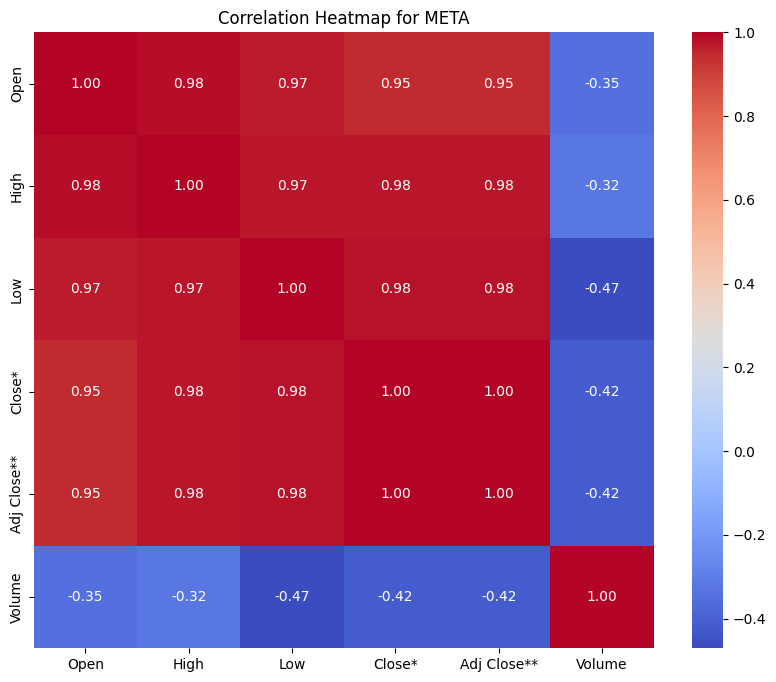

### AMZN

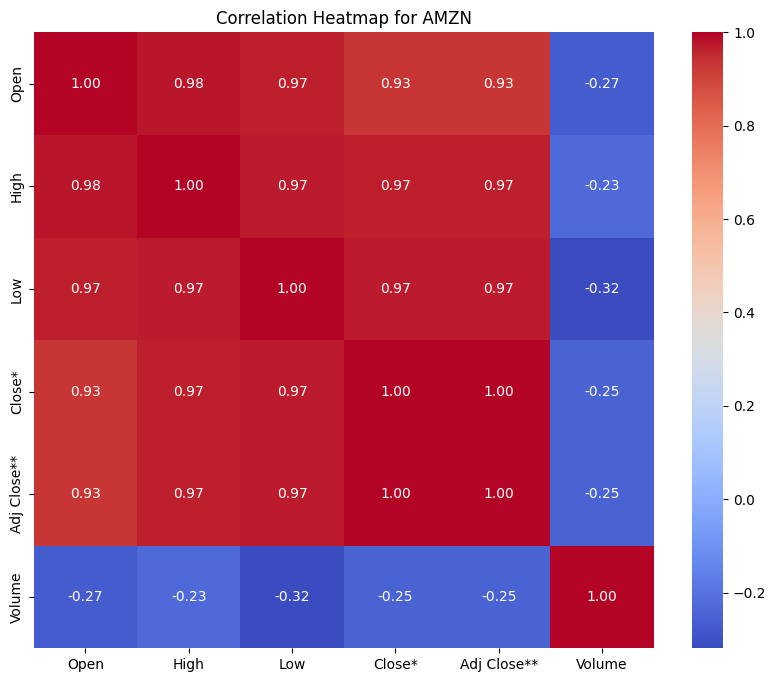

### AAPL

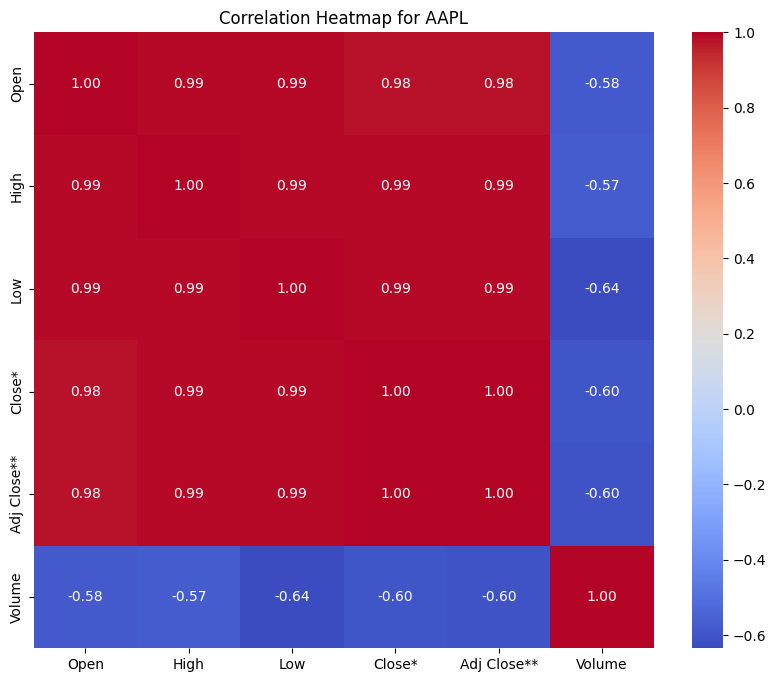

### NFLX

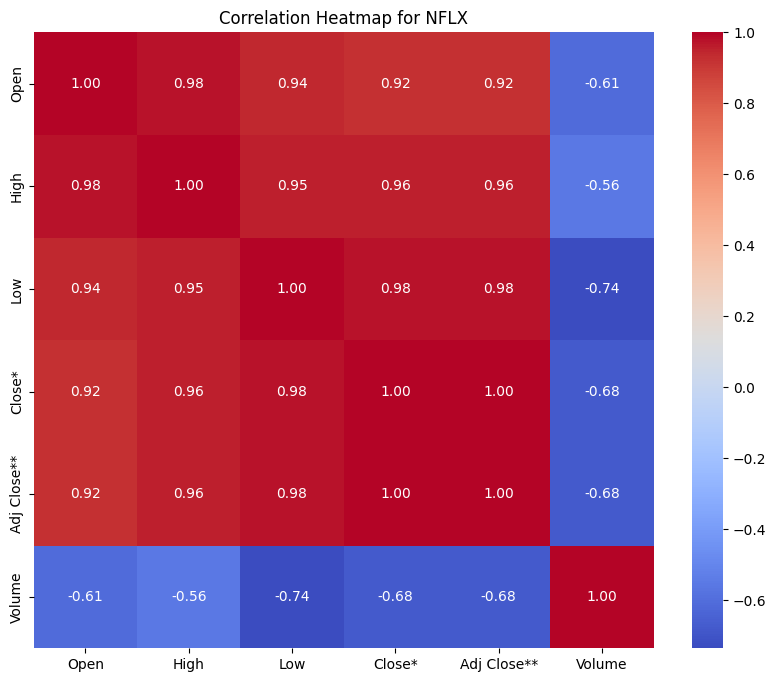

### GOOGL

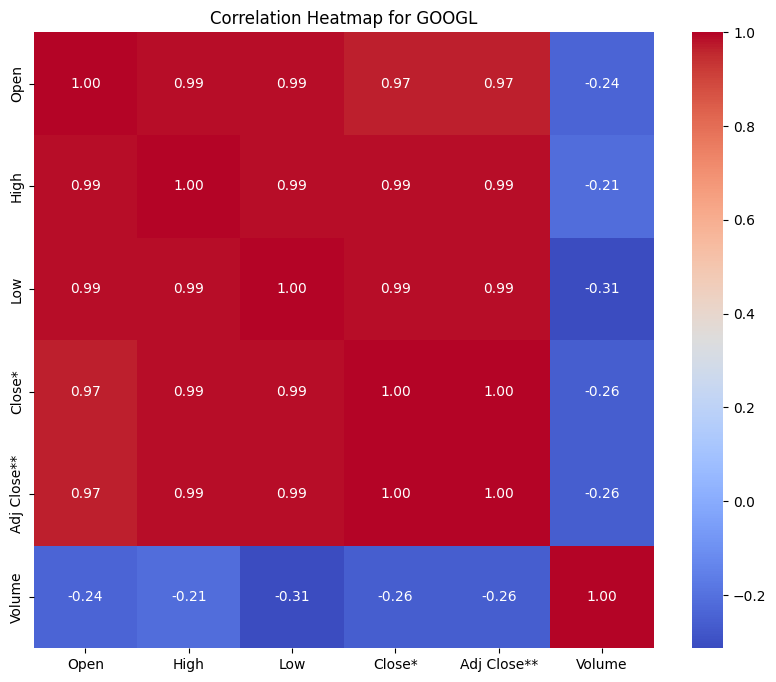

In [53]:
for ticker in company_tickers:
    display(Markdown(f'### {ticker}'))
    plot_correlation_heatmap(ticker)

In [54]:
def plot_layoff(stock_data, layoff_data):
    stock = pd.read_csv(stock_data)
    layoff = pd.read_csv(layoff_data)

    # Convert 'Date' to datetime in both dataframes
    stock['Date'] = pd.to_datetime(stock['Date'])
    layoff['Date'] = pd.to_datetime(layoff['Date'])

    # Drop unnecessary columns from the stock data
    stock = stock.drop(['Open', 'High', 'Low', 'Close*', 'Volume'], axis=1)

    # Initialize the plot
    fig, ax1 = plt.subplots(figsize=(12,7))

    # Plot the layoff data as a bar chart on the first axis
    bars = ax1.bar(layoff['Date'], layoff['Laid Off'], label='Layoff', color='red', width=15)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Layoff Count', color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.set_title(f'Impact of layoff on stock performance of {os.path.basename(stock_data)}')
    ax1.xaxis_date()  # Ensure the x-axis is treated as dates

    # Annotate the top of each bar with its value
    for bar in bars:
        height = bar.get_height()
        ax1.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

    # Create the second axis for the stock data
    ax2 = ax1.twinx()

    # Plot the stock data as a line chart on the second axis
    ax2.plot(stock['Date'], stock['Adj Close**'], label='Actual Prices', color='blue', linestyle='-', marker='o')
    ax2.set_ylabel('Adjusted Close Price', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Set up the legend to show both labels
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    # Adjust the layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

### GOOGL

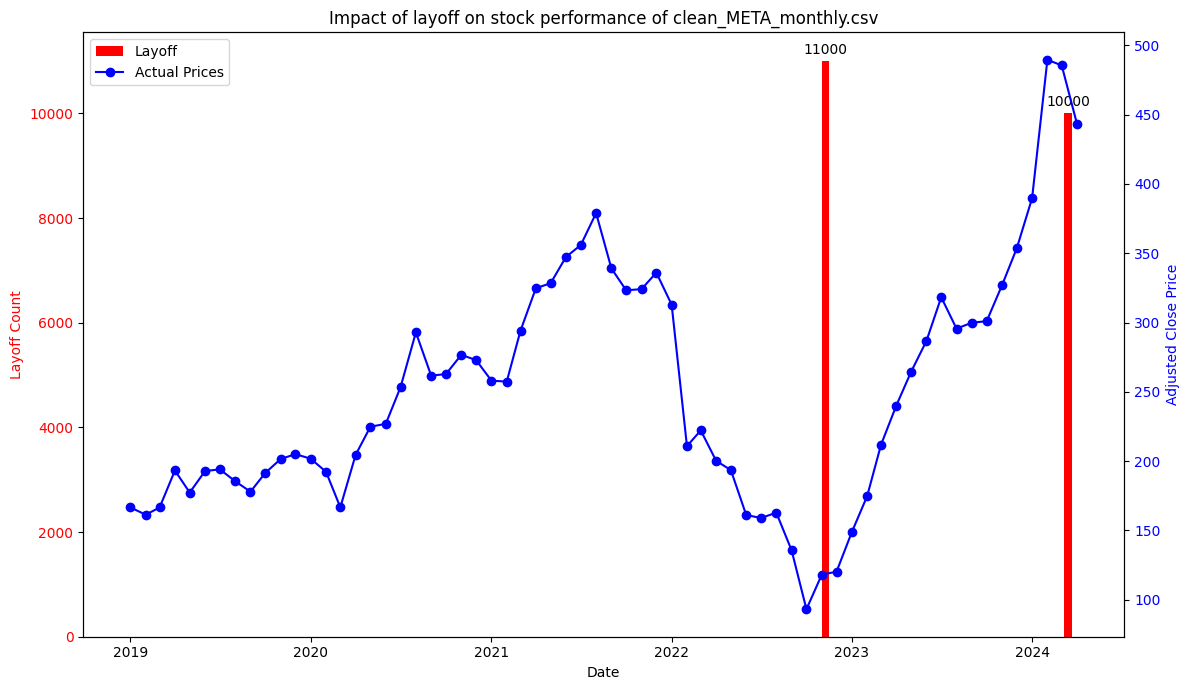

### GOOGL

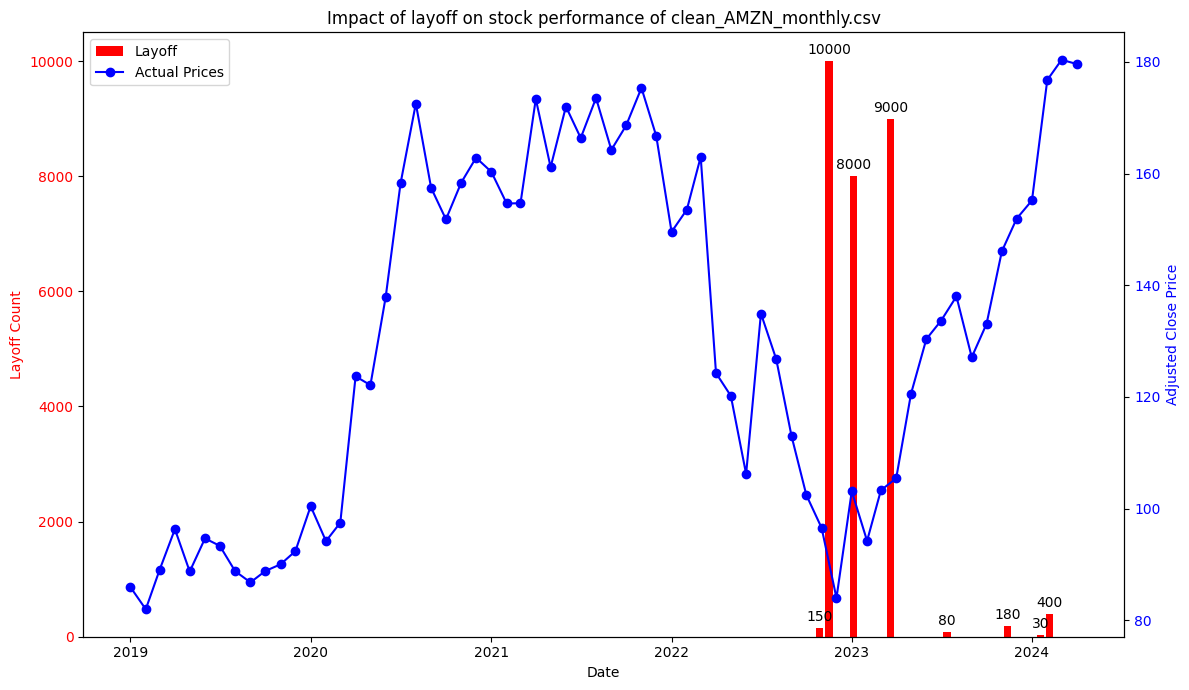

### GOOGL

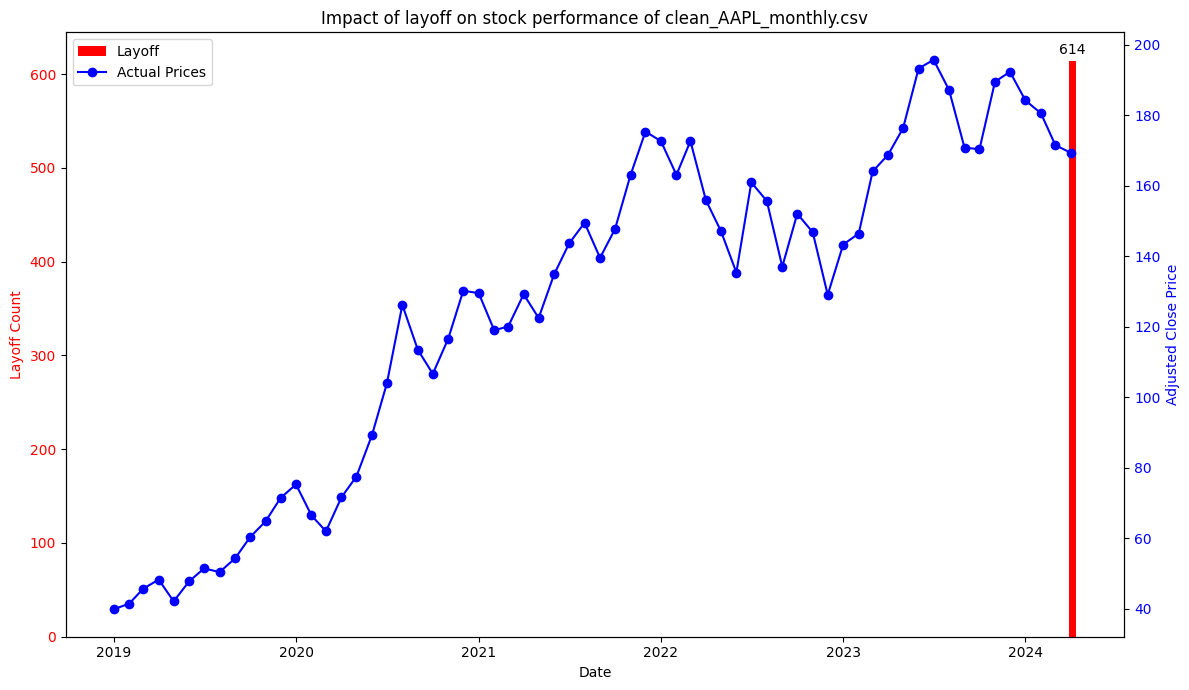

### GOOGL

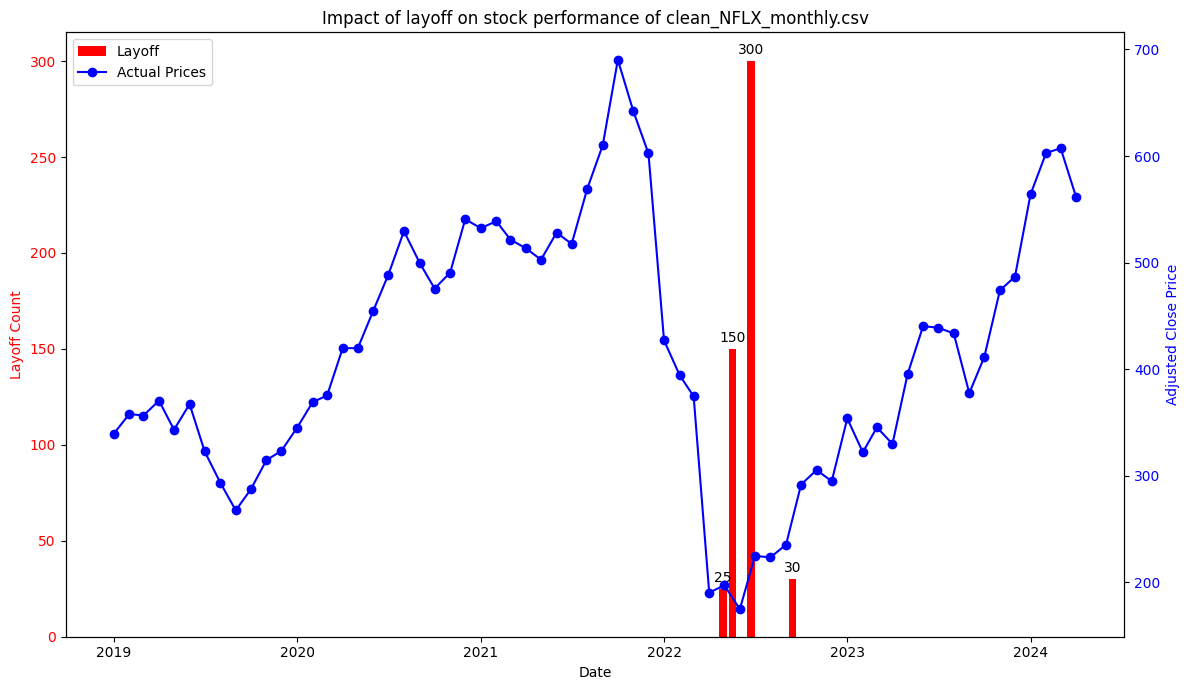

### GOOGL

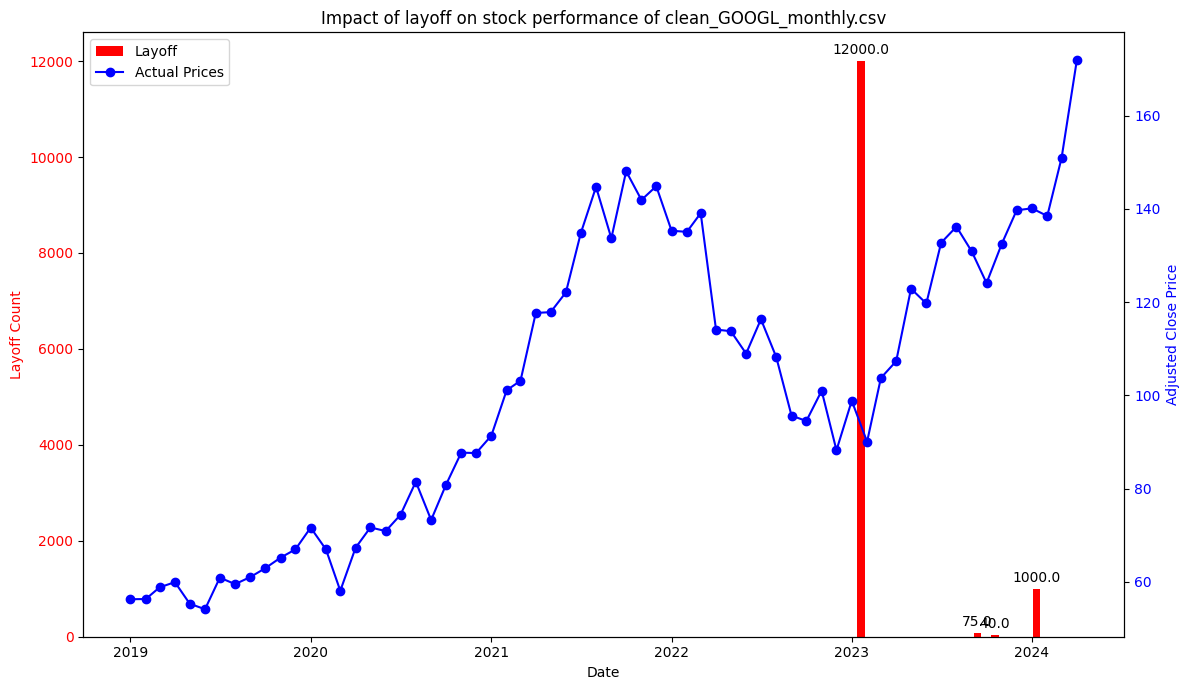

In [55]:
stock_data = [f'../data/processed/clean_{i}_monthly.csv' for i in company_tickers]
layoff_data = [f'../data/processed/{i.lower()}_laidoff.csv' for i in company_tickers]
for s_data, l_data in zip(stock_data, layoff_data):
    display(Markdown(f'### {ticker}'))
    plot_layoff(s_data, l_data)

In [56]:
# Plotting moving average based on close price
def plot_simple_moving_average(rolling_counts, data):
    for key in data.keys():
        # Create a separate subplot for each company
        fig, ax = plt.subplots(figsize=(8, 4))

        # Plot the close price for the current company
        ax.plot(data[key]['Adj Close**'], label='Adj Close')

        for rolling_count in rolling_counts:
            # Calculate and plot the Simple Moving Average
            data[key][f'SMA{rolling_count}'] = data[key]['Adj Close**'].rolling(rolling_count).mean()
            data[key][f'SMA{rolling_count}'].dropna(inplace=True)
            ax.plot(data[key][f'SMA{rolling_count}'], label=f'{rolling_count}-Month MA')

        # Set plot title and labels
        ax.set_title(f'{key} Simple Moving Averages')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()

    # Show the plots
    plt.show()

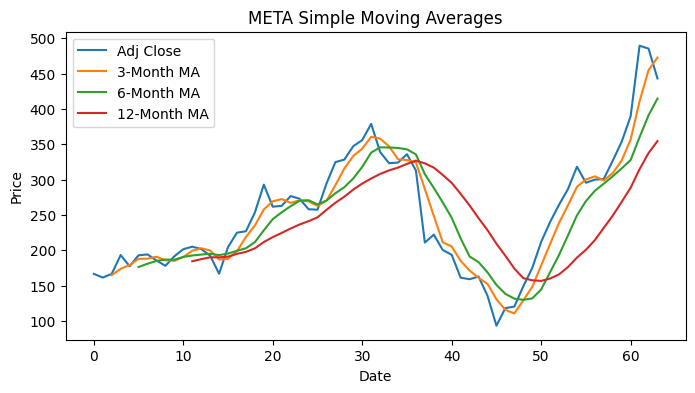

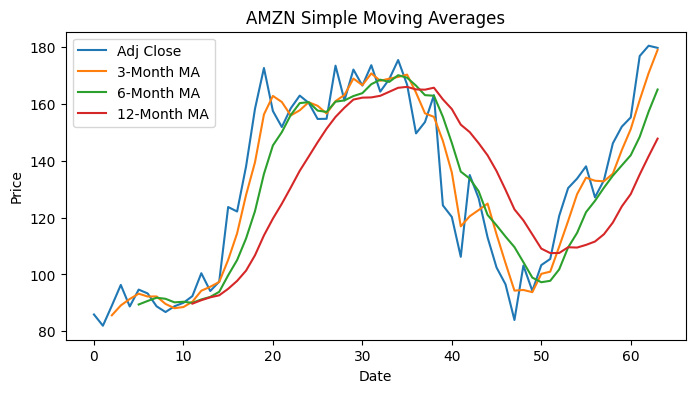

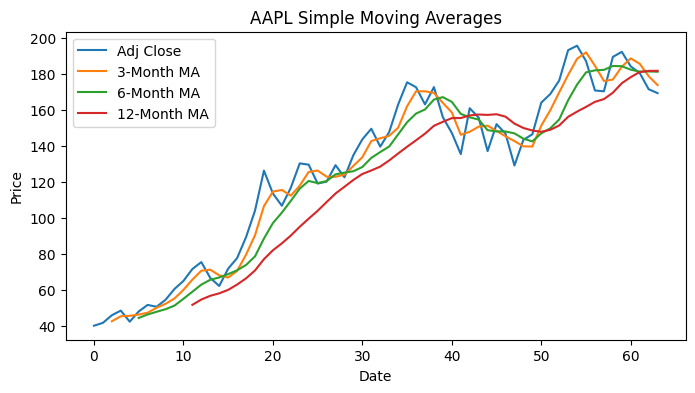

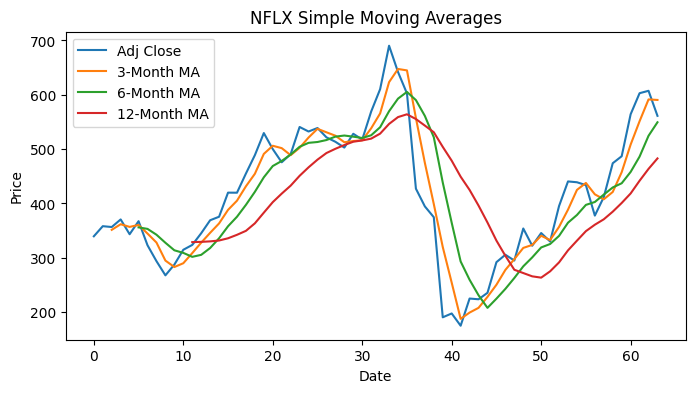

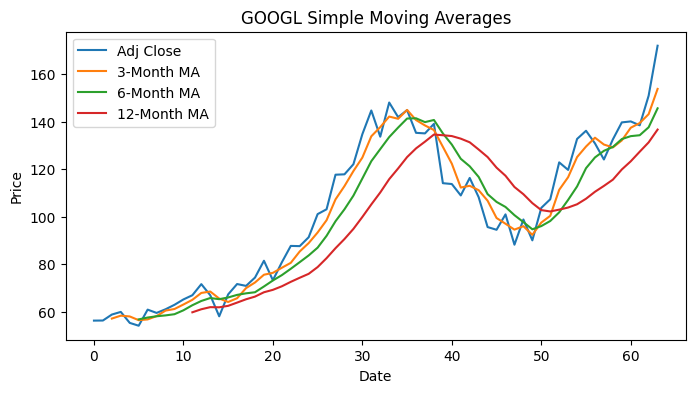

In [57]:
import copy

moving_average_data = copy.deepcopy(clean_company_data)
plot_simple_moving_average([3, 6, 12], moving_average_data)

In [58]:
print(clean_company_data)

{'META':          Date    Open    High     Low  Close*  Adj Close**        Volume
0  2019-01-01  128.99  171.68  128.56  166.69       166.51  5.275479e+08
1  2019-02-01  165.84  172.47  159.59  161.45       161.28  3.022432e+08
2  2019-03-01  162.60  174.30  159.28  166.69       166.51  3.879361e+08
3  2019-04-01  167.83  198.48  167.28  193.40       193.20  3.819853e+08
4  2019-05-01  194.78  196.18  177.16  177.47       177.28  2.868215e+08
5  2019-06-01  175.00  198.88  160.84  193.00       192.80  4.264286e+08
6  2019-07-01  195.21  208.66  191.93  194.23       194.02  3.510209e+08
7  2019-08-01  194.17  198.47  176.66  185.67       185.47  2.946895e+08
8  2019-09-01  184.00  193.10  175.66  178.08       177.89  2.645385e+08
9  2019-10-01  179.15  198.09  173.09  191.65       191.45  3.262072e+08
10 2019-11-01  192.85  203.80  188.54  201.64       201.43  2.583039e+08
11 2019-12-01  202.13  208.93  193.17  205.25       205.03  2.762571e+08
12 2020-01-01  206.75  224.20  201.06  201

In [59]:
def plot_simple_moving_average_all_in_1(rolling_counts, data):
    # Create a single plot
    fig, ax = plt.subplots(figsize=(10, 6))

    for key in data.keys():
        # Plot the close price for the current company
        ax.plot(data[key]['Adj Close**'], label=f'{key} Adj Close')

        for rolling_count in rolling_counts:
            # Calculate and plot the Simple Moving Average
            data[key][f'SMA{rolling_count}'] = data[key]['Close*'].rolling(rolling_count).mean()
            data[key][f'SMA{rolling_count}'].dropna(inplace=True)
            ax.plot(data[key][f'SMA{rolling_count}'], label=f'{key} {rolling_count}-Month MA', linestyle='--')

        # Add a legend for the current company
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Company Legends')

    # Set plot title and labels
    ax.set_title('Simple Moving Averages for All Companies')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

    # Show the plot
    plt.show()

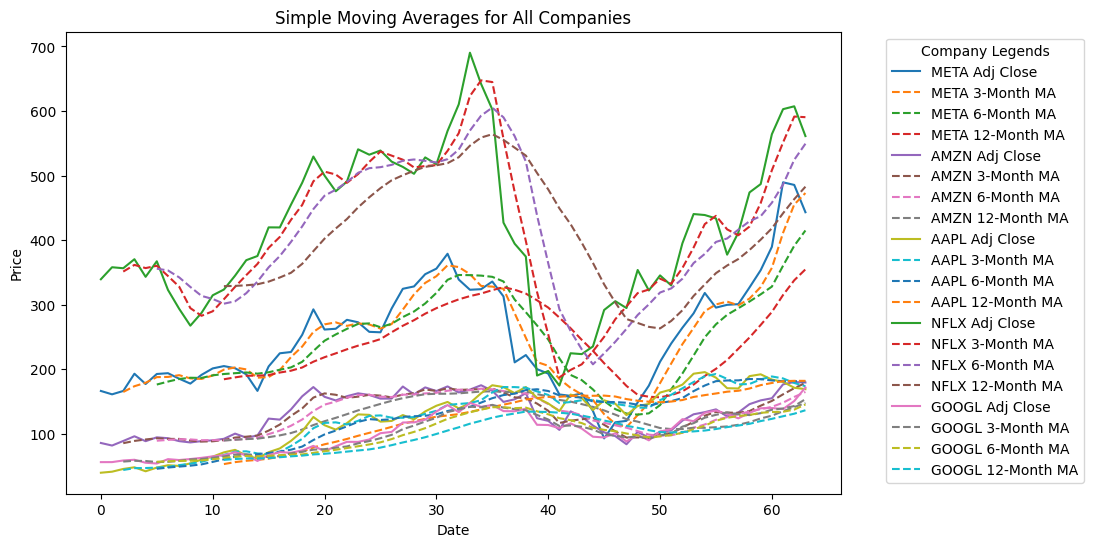

In [60]:
plot_simple_moving_average_all_in_1([3,6,12], moving_average_data)

In [61]:
# Plotting moving average based on close price
def plot_exponential_moving_average(rolling_counts, data):
    for key in data.keys():
        # Create a separate subplot for each company
        fig, ax = plt.subplots(figsize=(8, 4))

        # Plot the close price for the current company
        ax.plot(data[key]['Adj Close**'], label='Adj Close')

        for rolling_count in rolling_counts:
            # Calculate and plot the Simple Moving Average
            data[key][f'EMA{rolling_count}'] = data[key]['Adj Close**'].ewm(span=rolling_count, adjust=True).mean()
            data[key][f'EMA{rolling_count}'].dropna(inplace=True)
            ax.plot(data[key][f'EMA{rolling_count}'], label=f'{rolling_count}-Month EMA')

        # Set plot title and labels
        ax.set_title(f'{key} Simple Moving Averages')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()

    # Show the plots
    plt.show()

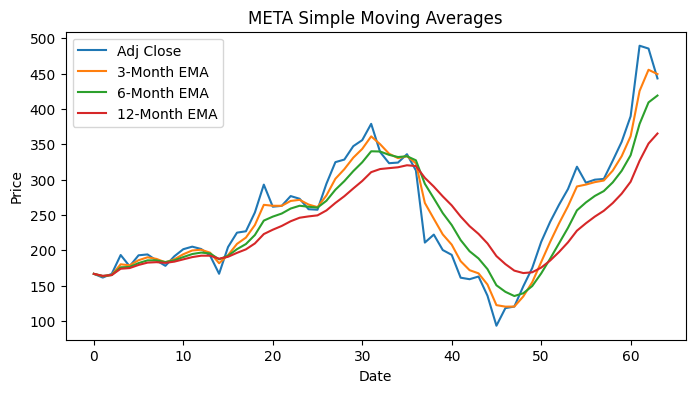

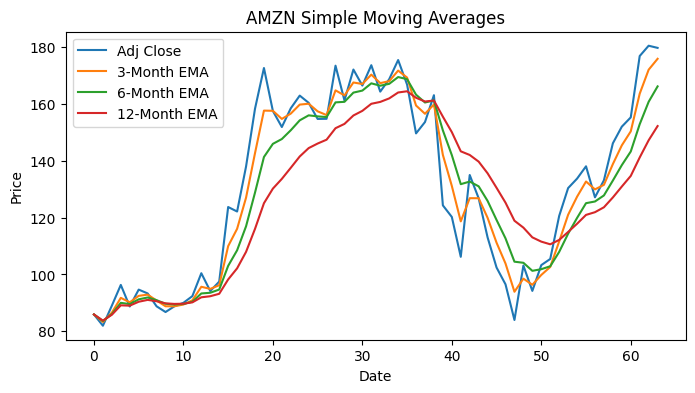

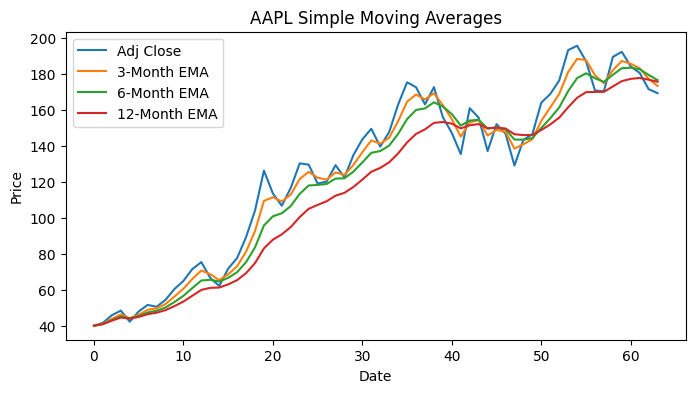

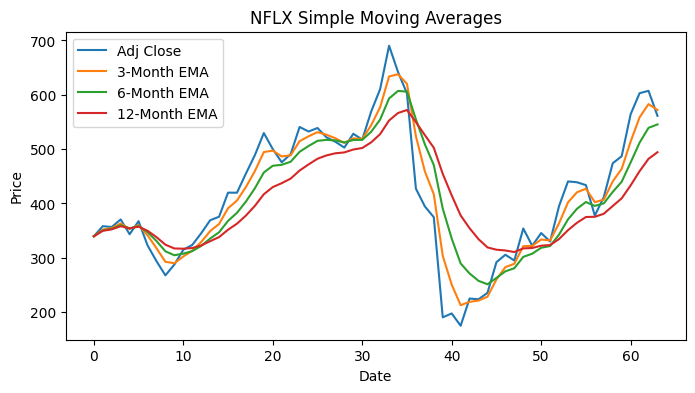

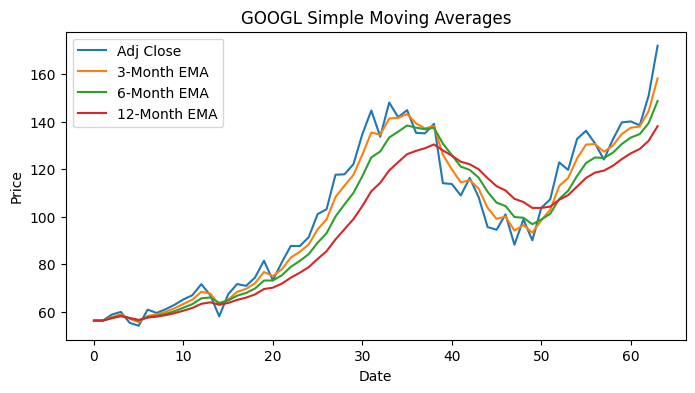

In [62]:
plot_exponential_moving_average([3,6,12], moving_average_data)

In [63]:
print(moving_average_data)

{'META':          Date    Open    High     Low  Close*  Adj Close**        Volume  \
0  2019-01-01  128.99  171.68  128.56  166.69       166.51  5.275479e+08   
1  2019-02-01  165.84  172.47  159.59  161.45       161.28  3.022432e+08   
2  2019-03-01  162.60  174.30  159.28  166.69       166.51  3.879361e+08   
3  2019-04-01  167.83  198.48  167.28  193.40       193.20  3.819853e+08   
4  2019-05-01  194.78  196.18  177.16  177.47       177.28  2.868215e+08   
5  2019-06-01  175.00  198.88  160.84  193.00       192.80  4.264286e+08   
6  2019-07-01  195.21  208.66  191.93  194.23       194.02  3.510209e+08   
7  2019-08-01  194.17  198.47  176.66  185.67       185.47  2.946895e+08   
8  2019-09-01  184.00  193.10  175.66  178.08       177.89  2.645385e+08   
9  2019-10-01  179.15  198.09  173.09  191.65       191.45  3.262072e+08   
10 2019-11-01  192.85  203.80  188.54  201.64       201.43  2.583039e+08   
11 2019-12-01  202.13  208.93  193.17  205.25       205.03  2.762571e+08   
12 

Processing META


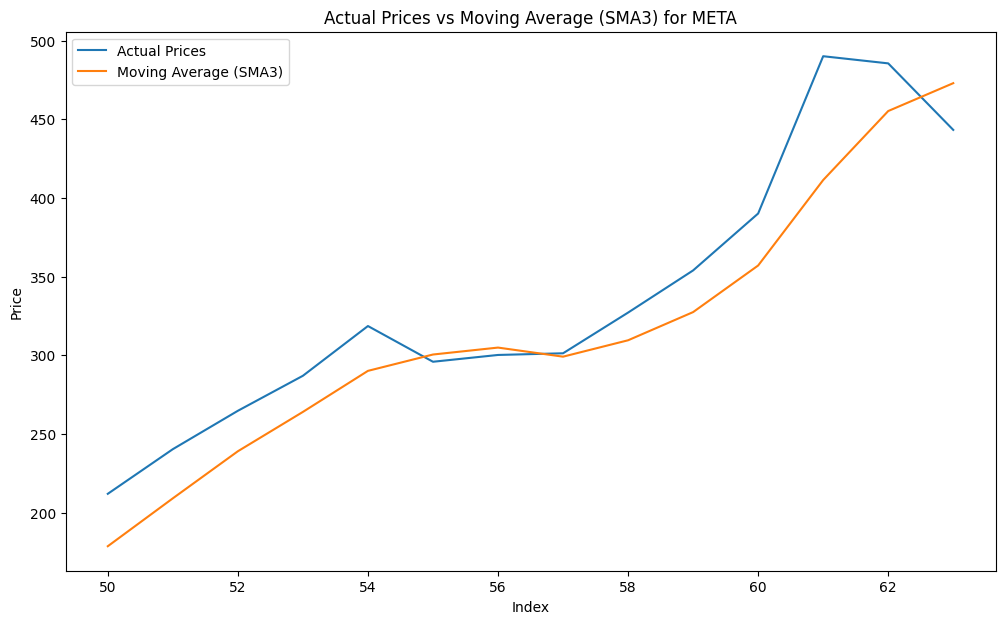

Processing AMZN


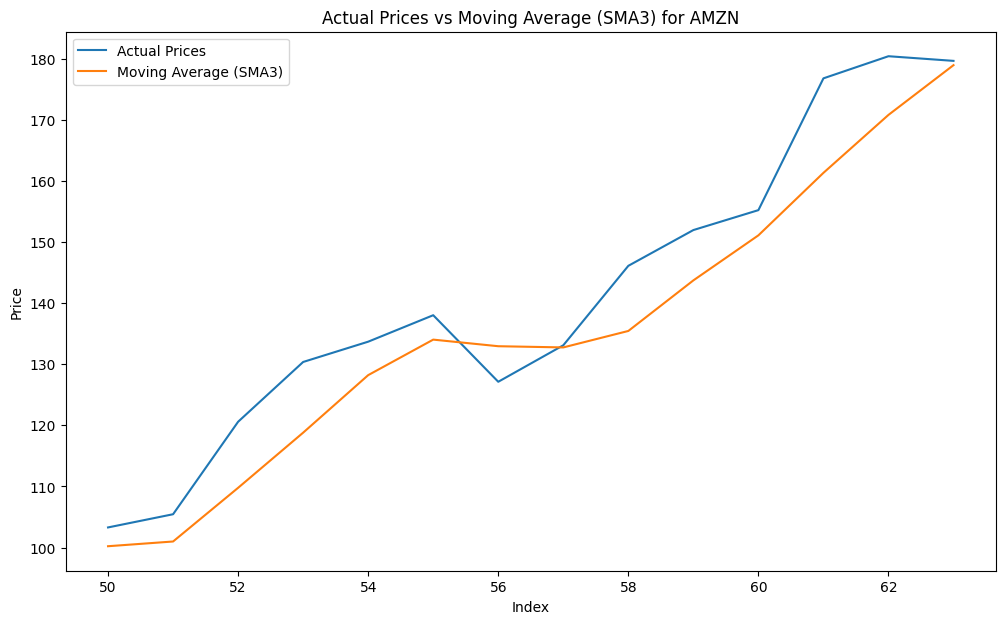

Processing AAPL


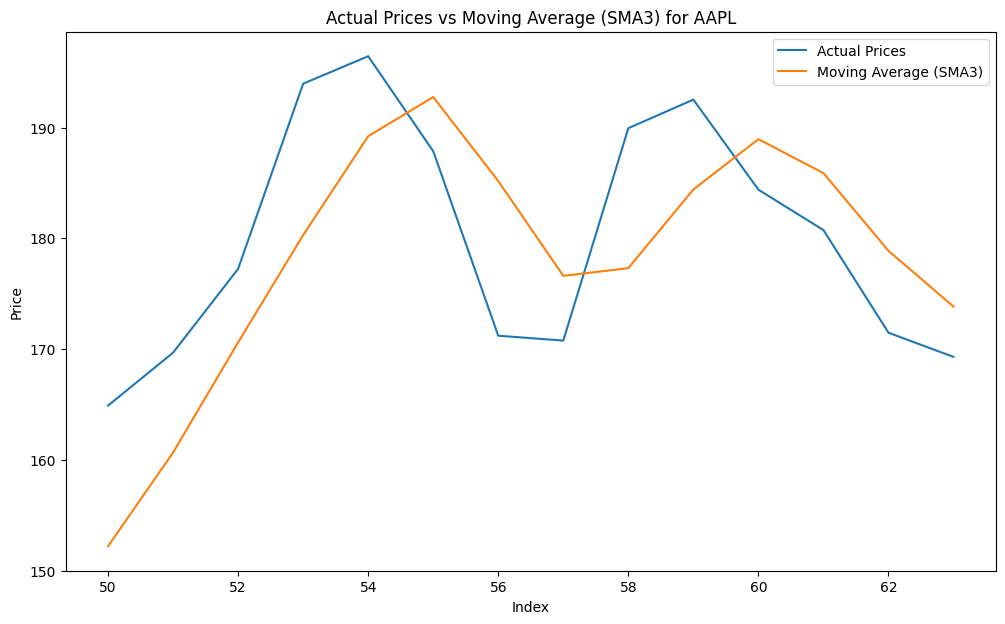

Processing NFLX


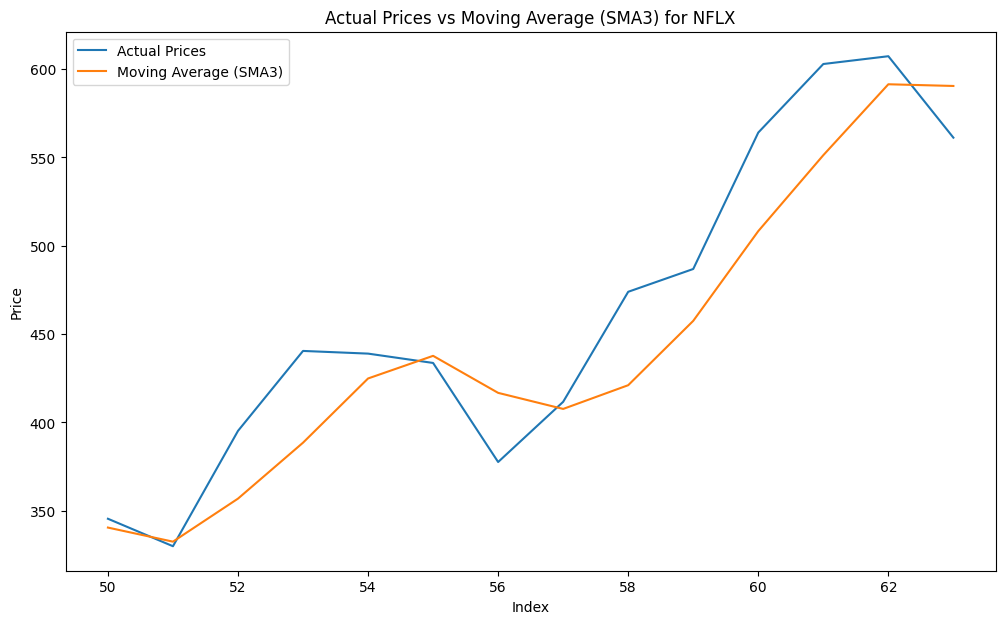

Processing GOOGL


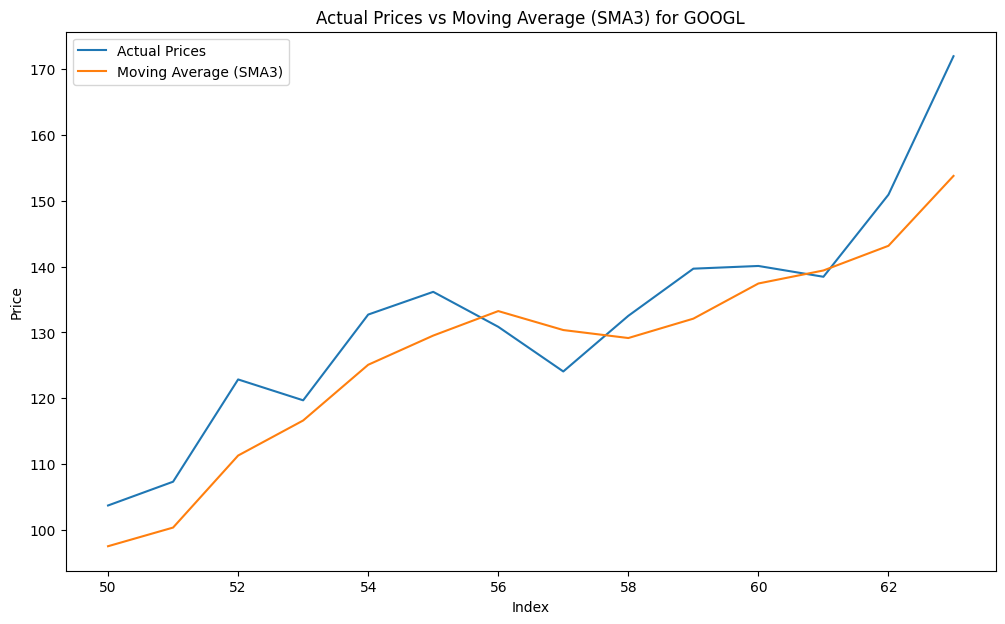

In [64]:
ticker_symbols = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']
RMSE = []
MAE = []
R_SQUARED = []

for ticker_symbol in ticker_symbols:
    print(f'Processing {ticker_symbol}')

    data = moving_average_data[ticker_symbol].drop(['Date', 'Close*', 'Adj Close**'], axis=1)

    plt.figure(figsize=(12, 7))

    index_values = moving_average_data[ticker_symbol].index[50:]  # Use index instead of Date
    plt.plot(index_values, moving_average_data[ticker_symbol]['Close*'][50:], label='Actual Prices')
    plt.plot(index_values, moving_average_data[ticker_symbol]['SMA3'][50:], label='Moving Average (SMA3)')

    rmse = sqrt(mean_squared_error(moving_average_data[ticker_symbol]['Close*'][50:], moving_average_data[ticker_symbol]['SMA3'][50:]))
    mae = mean_absolute_error(moving_average_data[ticker_symbol]['Close*'][50:], moving_average_data[ticker_symbol]['SMA3'][50:])
    r_squared = r2_score(moving_average_data[ticker_symbol]['Close*'][50:], moving_average_data[ticker_symbol]['SMA3'][50:])
    RMSE.append(rmse)
    MAE.append(mae)
    R_SQUARED.append(r_squared)

    plt.title(f'Actual Prices vs Moving Average (SMA3) for {ticker_symbol}')
    plt.xlabel('Index')  # Set xlabel to 'Index'
    plt.ylabel('Price')
    plt.legend()
    plt.show()


In [65]:
results_df = pd.DataFrame({'Ticker Symbol': ticker_symbols, 'RMSE': RMSE, 'MAE': MAE, 'R-SQUARED': R_SQUARED})
print(results_df.to_markdown(index=False))

| Ticker Symbol   |     RMSE |      MAE |   R-SQUARED |
|:----------------|---------:|---------:|------------:|
| META            | 31.8919  | 26.3645  |    0.853804 |
| AMZN            |  7.97186 |  6.73643 |    0.891472 |
| AAPL            |  8.97284 |  8.31119 |    0.246154 |
| NFLX            | 34.3383  | 28.1393  |    0.848473 |
| GOOGL           |  7.7673  |  6.51643 |    0.780289 |


## Comparative Stock Performance Analysis

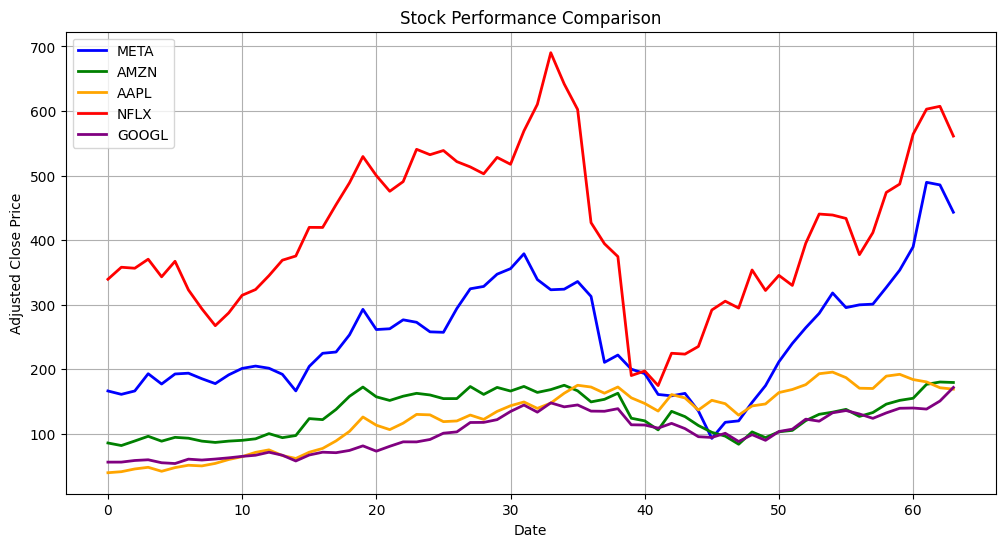

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Define a color map for the lines
colors = ['blue', 'green', 'orange', 'red', 'purple']

for i, ticker in enumerate(clean_company_data.keys()):
    plt.plot(
        clean_company_data[ticker].index,
        clean_company_data[ticker]['Adj Close**'],
        label=ticker,
        color=colors[i],  # Assign a unique color to each stock
        linestyle='-',    # You can change the line style if needed
        linewidth=2        # Adjust the line width for better visibility
    )

plt.title('Stock Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Volatility Analysis

In [67]:
import copy

volatility_data = copy.deepcopy(clean_company_data)

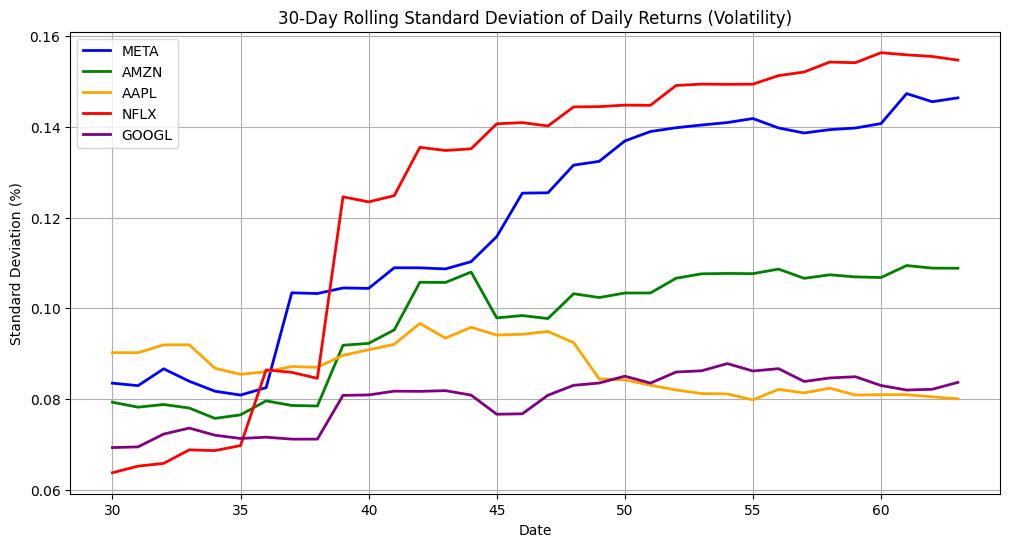

In [68]:
import matplotlib.pyplot as plt

# Calculate daily returns for each stock
for ticker in volatility_data.keys():
    volatility_data[ticker]['Daily Return'] = volatility_data[ticker]['Adj Close**'].pct_change()

plt.figure(figsize=(12, 6))

# Define a color map for the lines
colors = ['blue', 'green', 'orange', 'red', 'purple']

for i, ticker in enumerate(volatility_data.keys()):
    plt.plot(
        volatility_data[ticker].index,
        volatility_data[ticker]['Daily Return'].rolling(window=30).std(),
        label=ticker,
        color=colors[i],
        linestyle='-',
        linewidth=2
    )

plt.title('30-Day Rolling Standard Deviation of Daily Returns (Volatility)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation (%)')  # Format y-axis as percentage
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Financial Health (Annual data)

In [69]:
# We tried to solve the Financial Health but it was impossible to solve it. However we spend so much time for the problem so we want to leave it here.
# ticker = 'META'

# # we dont need this part because we already have it but it was just easier for me.
# balance_sheet = clean_financial_data[ticker]['annual_balance_sheet']
# income_statement = clean_financial_data[ticker]['annual_income_statement']
# cash_flow = clean_financial_data[ticker]['annual_cash_flow']

# #Current Ratio
# #current_ratio = balance_sheet.loc['Total Current Assets'] / balance_sheet.loc['Total Current Liabilities']
# #Quick Ratio
# #quick_ratio = (balance_sheet.loc['Total Current Assets'] - balance_sheet.loc['Inventory']) / balance_sheet.loc['Total Current Liabilities']
# #D/E ratio (Debt to Equity ratio)
# #debt_to_equity_ratio = balance_sheet.loc['Total Liab'] / balance_sheet.loc['Total Stockholder Equity']
# #Trend Analysis
# # Assuming the data includes a 'Year' column and the relevant financial data
# #income_statement['Year'] = pd.to_datetime(income_statement['Year'])
# #trend_analysis = income_statement.set_index('Year')[['Total Revenue', 'Net Income']]

# trend_analysis = income_statement[['Total Revenue', 'Net Income']]
# # Margin Analysis
# income_statement['Gross Margin'] = income_statement['Gross Profit'] / income_statement['Total Revenue']
# income_statement['Operating Margin'] = income_statement['Operating Income'] / income_statement['Total Revenue']
# income_statement['Net Profit Margin'] = income_statement['Net Income'] / income_statement['Total Revenue']
# #Capital Expenditure Analysis
# # Capital Expenditure is usually a negative number in the Cash Flow statement, often listed as 'Capital Expenditures'
# cash_flow['Capital Expenditure'] = -cash_flow['Capital Expenditures']
# capex_analysis = cash_flow[['Year', 'Capital Expenditure']].set_index('Year')
# # Investment Analysis
# # Assuming you provide a 'Current Stock Price' variable
# current_stock_price = 100  # placeholder for the current stock price
# latest_earnings = income_statement[income_statement['Year'] == income_statement['Year'].max()]['Net Income'].iloc[0]
# total_shares = balance_sheet[balance_sheet['Year'] == balance_sheet['Year'].max()]['Total Common Shares Outstanding'].iloc[0]
# earnings_per_share = latest_earnings / total_shares
# pe_ratio = current_stock_price / earnings_per_share
# #Net Porfit Margin
# net_profit_margin = income_statement.loc['Net Income'] / income_statement.loc['Total Revenue']
# # ROE (Return on Equity)
# roe = income_statement.loc['Net Income'] / balance_sheet.loc['Total Stockholder Equity']
# # EPS (Earning per Share)
# eps = income_statement.loc['Net Income'] / income_statement.loc['Weighted Average Shs Out']

# ratios = pd.DataFrame({

#     'Net Profit Margin': net_profit_margin,
#     'Return on Equity': roe,
#     'Earnings Per Share': eps
# })

# print(ratios)

### Predictive Modeling (predicting in 30 days)

In [70]:
# ticker_symbol = 'META'

In [71]:
# data = clean_company_data[ticker_symbol].drop(['Date', 'Close*', 'Adj Close**'], axis=1)
# training_x, testing_x , training_y, testing_y = train_test_split(data, clean_company_data[ticker_symbol]['Close*'], test_size=0.20,shuffle = False)
# display(Markdown(f'### Training'))
# print(training_x)
# display(Markdown(f'### Testing'))
# print(testing_x)

Processing ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']
     Open    High     Low       Volume
0  128.99  171.68  128.56  527547900.0
1  165.84  172.47  159.59  302243200.0
2  162.60  174.30  159.28  387936100.0
3  167.83  198.48  167.28  381985300.0
4  194.78  196.18  177.16  286821500.0
      Open    High     Low       Volume
51  208.84  241.69  207.13  446687900.0
52  238.62  268.65  229.85  486968500.0
53  265.90  289.79  258.88  480979900.0
54  286.70  326.20  284.85  624605100.0
55  317.54  324.14  274.38  423147800.0
Test RMSE for META: 10.950016559767736
Test MAE for META: 8.829102797813558
Test R-SQUARED for META: 0.9807011926648639


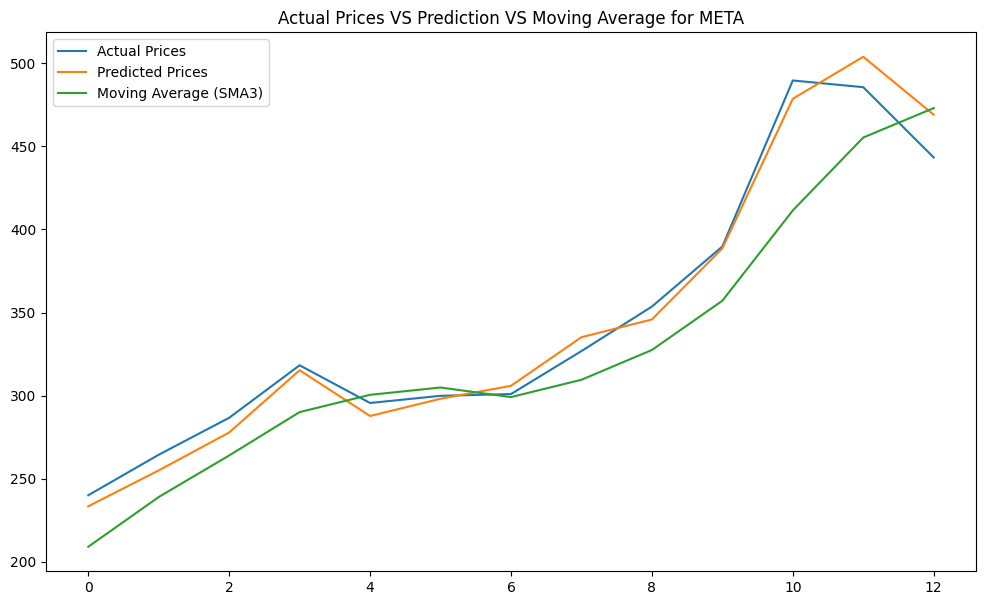

Processing ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']
    Open   High    Low        Volume
0  73.26  86.82  73.05  2.680034e+09
1  81.94  83.65  78.34  1.618738e+09
2  82.76  91.19  79.33  2.016644e+09
3  90.01  97.82  89.94  1.624784e+09
4  96.65  98.22  88.64  1.964288e+09
      Open    High     Low        Volume
51  102.30  110.86   97.71  1.224084e+09
52  104.95  122.92  101.15  1.432892e+09
53  120.69  131.49  119.93  1.242649e+09
54  130.82  136.65  125.92  1.058755e+09
55  133.55  143.63  126.41  1.210426e+09
Test RMSE for AMZN: 5.260778493510876
Test MAE for AMZN: 4.7223554843296816
Test R-SQUARED for AMZN: 0.9456707936197118


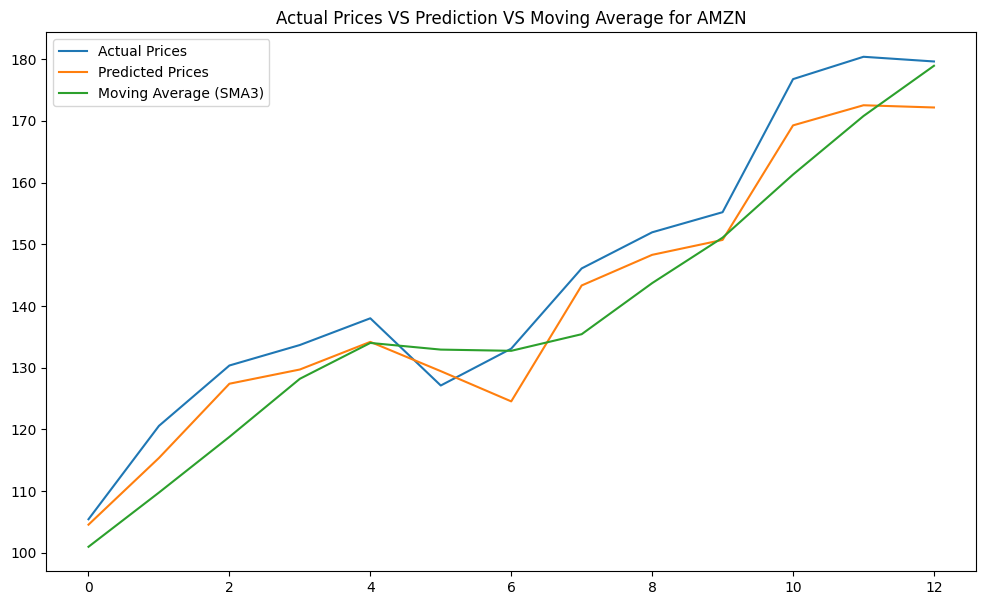

Processing ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']
    Open   High    Low        Volume
0  38.72  42.25  35.50  3.312350e+09
1  41.74  43.97  41.48  1.890162e+09
2  43.57  49.42  42.38  2.603926e+09
3  47.91  52.12  47.10  2.024471e+09
4  52.47  53.83  43.75  2.957826e+09
      Open    High     Low        Volume
51  164.27  169.85  159.78  9.697097e+08
52  169.28  179.35  164.31  1.275156e+09
53  177.70  194.48  176.93  1.297101e+09
54  193.78  198.23  186.60  9.960664e+08
55  196.24  196.73  171.96  1.322439e+09
Test RMSE for AAPL: 5.790374401847276
Test MAE for AAPL: 4.47904212120549
Test R-SQUARED for AAPL: 0.6449256295554489


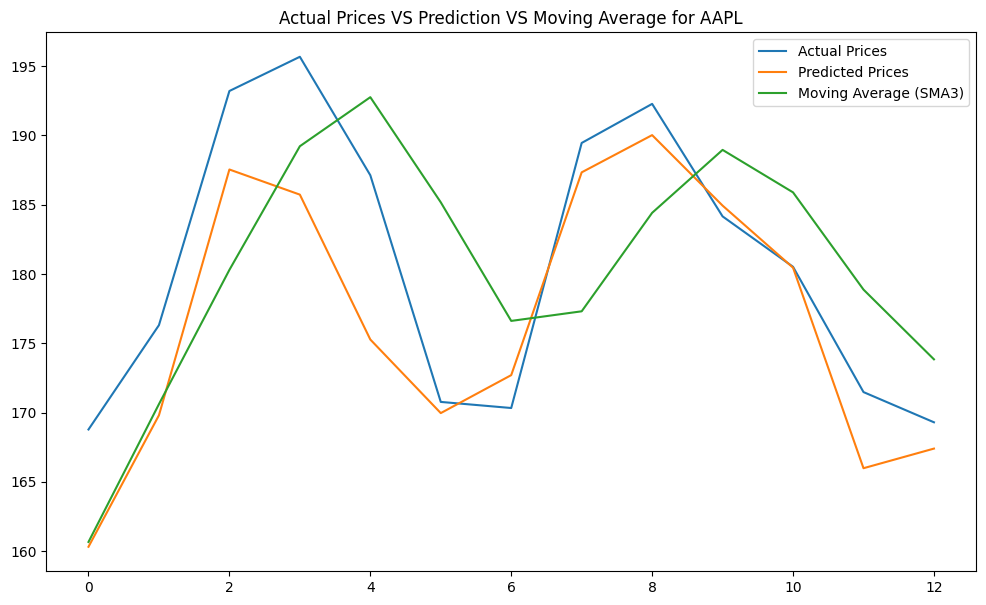

Processing ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']
     Open    High     Low     Volume
0  259.28  358.85  256.58  306616400
1  337.18  371.49  336.50  148192100
2  362.26  379.00  342.47  144843100
3  359.00  384.80  342.27  165079400
4  374.00  385.99  341.39  125298300
      Open    High     Low     Volume
51  341.83  349.80  316.10  127984500
52  329.44  405.11  315.62  145471700
53  397.41  448.65  393.08  147230800
54  439.76  485.00  411.88  168720200
55  437.37  445.25  398.15  107298900
Test RMSE for NFLX: 17.324101766350687
Test MAE for NFLX: 14.769488341717555
Test R-SQUARED for NFLX: 0.9586224963057379


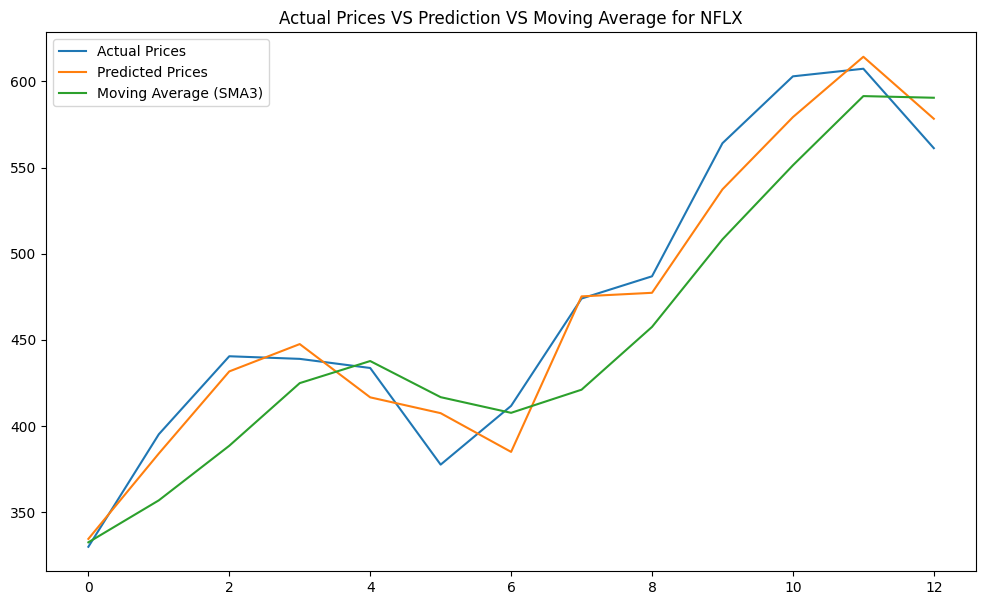

Processing ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']
    Open   High    Low       Volume
0  51.36  56.38  51.12  697168000.0
1  56.11  57.70  54.68  652174000.0
2  56.55  61.82  56.51  663738000.0
3  59.38  64.85  59.15  647446000.0
4  59.88  59.96  55.17  742726000.0
      Open    High     Low       Volume
51  102.39  109.17  101.93  604106300.0
52  106.84  126.43  103.71  820545400.0
53  122.82  129.04  116.10  656756700.0
54  119.24  133.74  115.35  708341500.0
55  130.78  138.00  126.38  593289000.0
Test RMSE for GOOGL: 4.433284654867463
Test MAE for GOOGL: 3.836418460204457
Test R-SQUARED for GOOGL: 0.9139711387842525


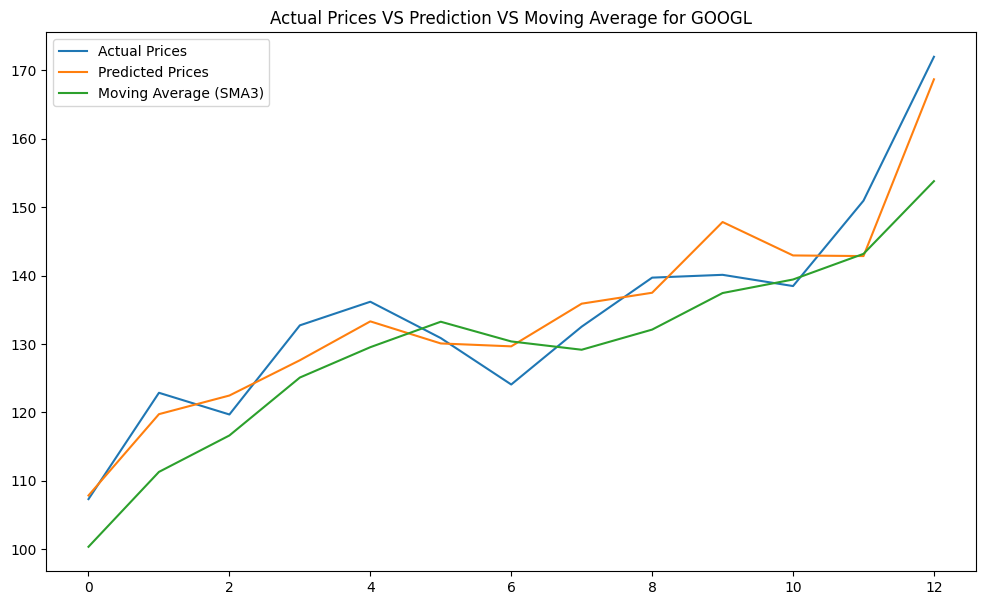

In [72]:
ticker_symbols = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']
RMSE = []
MAE = []
R_SQUARED = []
for ticker_symbol in ticker_symbols:
    print(f'Processing {ticker_symbols}')
    data = clean_company_data[ticker_symbol].drop(['Date', 'Close*', 'Adj Close**'], axis=1)
    training_x, testing_x , training_y, testing_y = train_test_split(
        data, clean_company_data[ticker_symbol]['Adj Close**'], test_size=0.20,shuffle = False
    )
    print(training_x.head())
    print(testing_x.head())
    model = LinearRegression()
    model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    rmse = sqrt(mean_squared_error(testing_y, predictions))
    mae = mean_absolute_error(testing_y, predictions)
    r_squared = r2_score(testing_y, predictions)
    RMSE.append(rmse)
    MAE.append(mae)
    R_SQUARED.append(r_squared)
    print(f"Test RMSE for {ticker_symbol}: {rmse}")
    print(f"Test MAE for {ticker_symbol}: {mae}")
    print(f"Test R-SQUARED for {ticker_symbol}: {r_squared}")
    plt.figure(figsize=(12,7))
    x_values = np.arange(len(testing_y))
    plt.plot(x_values, testing_y, label='Actual Prices')
    plt.plot(x_values, predictions, label='Predicted Prices')
    plt.plot(x_values, moving_average_data[ticker_symbol]['SMA3'][51:], label='Moving Average (SMA3)')
   
    plt.title(f'Actual Prices VS Prediction VS Moving Average for {ticker_symbol}')
    plt.legend()
    plt.show()

In [73]:
results_df = pd.DataFrame({'Ticker Symbol': ticker_symbols, 'RMSE': RMSE, 'MAE': MAE, 'R-SQUARED': R_SQUARED})
print(results_df.to_markdown(index=False))

| Ticker Symbol   |     RMSE |      MAE |   R-SQUARED |
|:----------------|---------:|---------:|------------:|
| META            | 10.95    |  8.8291  |    0.980701 |
| AMZN            |  5.26078 |  4.72236 |    0.945671 |
| AAPL            |  5.79037 |  4.47904 |    0.644926 |
| NFLX            | 17.3241  | 14.7695  |    0.958622 |
| GOOGL           |  4.43328 |  3.83642 |    0.913971 |
